## Comparison to existing limits

This notebook reads the CSVs defined in Limits_calc.ipynb and compares them against other experiments.
Functions are also included to compare variants of the limit (such as the final limit vs KDAR-only limits)

In [2]:
#Loading libraries
import os
import json
import matplotlib.pyplot as plt
import numpy as np
import pyhf
import scipy
from scipy import stats
import uproot3
import uproot
import math
import awkward as ak
import pickle
import csv
import copy
import pandas as pd

from importlib import reload


### Some root paths used by different users/devices
#     root_dir = "../../For_David/" for the default root directory used by David
#     root_dir = "/exp/uboone/data/users/jbateman/workdir/HPS_uboone_analysis/" # Filepath used on the FNAL cluster.
#     root_dir = "/Users/user/PhD/HPS_uboone_analysis/" # A filepath used for local running.
root_dir = "/Users/user/PhD/HPS_uboone_analysis/"

print("Successful!")

Successful!


In [3]:
#Loading limits
cols = ['Mass','Value']

# Pawel_ee_uboone = pd.read_csv(path,names=cols)
# mumu_uboone = pd.read_csv(path,names=cols)
Belle_full = pd.read_csv(root_dir+"limit_files/belle_II_full_sin_theta.csv",names=cols)
Belle_full["Mass"] = 1000*Belle_full["Mass"] 
Belle_full["Value"] = np.sin(Belle_full["Value"])

# E949_theta_squared = pd.read_csv("../../limit_files/E949_theta_squared_limit.csv",names=cols) #Doesn't match what is plotted in Pawel's
E949_p1 = pd.read_csv(root_dir+"limit_files/e949_sin_theta.csv",names=cols)
E949_p2 = pd.read_csv(root_dir+"limit_files/e949_sin_theta_2.csv",names=cols)
E949_p1["Value"] = np.sin(E949_p1["Value"])
E949_p2["Value"] = np.sin(E949_p2["Value"])
E949_p1["Mass"] = 1000*E949_p1["Mass"]
E949_p2["Mass"] = 1000*E949_p2["Mass"]


NA62_p1 = pd.read_csv(root_dir+"limit_files/na62_sin_theta_1.csv",names=cols)
NA62_p2 = pd.read_csv(root_dir+"limit_files/na62_sin_theta_2.csv",names=cols)
NA62_p3 = pd.read_csv(root_dir+"limit_files/na62_sin_theta_3_alt.csv",names=cols)
NA62_p1["Value"] = np.sin(NA62_p1["Value"])
NA62_p2["Value"] = np.sin(NA62_p2["Value"]) 
NA62_p3["Value"] = np.sin(NA62_p3["Value"])
NA62_p1["Mass"] = 1000*NA62_p1["Mass"]
NA62_p2["Mass"] = 1000*NA62_p2["Mass"]
NA62_p3["Mass"] = 1000*NA62_p3["Mass"]

# LHCb_p1 = pd.read_csv("../../limit_files/LHCb_combined_theta_squared_p1.csv",names=cols) #mistyped axes, redo
# LSND_ee = pd.read_csv("../../limit_files/LSND_ee_theta_squared.csv",names=cols)
# LSND_mumu = pd.read_csv("../../limit_files/LSND_mumu_theta_squared.csv",names=cols)
PS191 = pd.read_csv(root_dir+"limit_files/ps191_theta.csv",names=cols)
CHARM_from_Owen = pd.read_csv(root_dir+"limit_files/charm_theta.csv",names=cols)
LHCb_from_Owen = pd.read_csv(root_dir+"limit_files/lhc_b_theta2.csv",names=cols)
LHCb_from_Owen["Value"] = np.sqrt(LHCb_from_Owen["Value"])
LHCb_from_Owen["Mass"] = 1000*LHCb_from_Owen["Mass"]

uboone_2021 = pd.read_csv(root_dir+"limit_files/uboone_ee_theta.csv",names=cols)
uboone_mumu_theta_squared = pd.read_csv(root_dir+"limit_files/uboone_mumu_theta2.csv",names=cols)
uboone_mumu_theta_squared["Value"] = np.sqrt(uboone_mumu_theta_squared["Value"])

uboone_NEW = pd.read_csv(root_dir+"limit_files/Brazil_plot/obs_limit_ALL_Capped_HPS_rebinned_limit.csv",names=cols)

# E949_scalar_factor = 0.084

# plot_list = []


In [4]:
# print(NA62_p2)

def Sort_by_mass(df):
    """
    Give dataframe with "Mass" column and sorts values by this.
    """
    df_copy = df.copy()
    df_sorted = df_copy.sort_values("Mass")
    
    return df_sorted

NA62_p2_sorted = Sort_by_mass(NA62_p2)

def Add_ones_start_end(df):
    """
    Adds 1.0 at the start and end of "Values" column in the dataframe.
    """
    df_copy = df.copy()
    
    # mass_val_start = df_copy["Mass"][0]
    # mass_val_end = df_copy["Mass"][-1:]
    firstLine = pd.DataFrame([[df['Mass'][0],1.]],columns=['Mass','Value'])
    lastLine = pd.DataFrame([[df['Mass'][-1:].values[0],1.]],columns=['Mass','Value'])
    
    # new_row = pd.DataFrame({"Mass":mass_val_start, "Value":1.0})
    # new_row_end = pd.DataFrame({"Mass":mass_val_end, "Value":1.0})
    
    df_merged = pd.concat([firstLine, df_copy]).reset_index(drop = True)
    df_merged = pd.concat([df_merged, lastLine]).reset_index(drop = True)
    
    return df_merged



In [5]:
Belle_ones = (Belle_full)
E949_p1_ones = (E949_p1)
E949_p2_ones = (E949_p2)
LHCb_Owen_ones = Add_ones_start_end(LHCb_from_Owen)
uboone_NEW_ones = Add_ones_start_end(uboone_NEW)

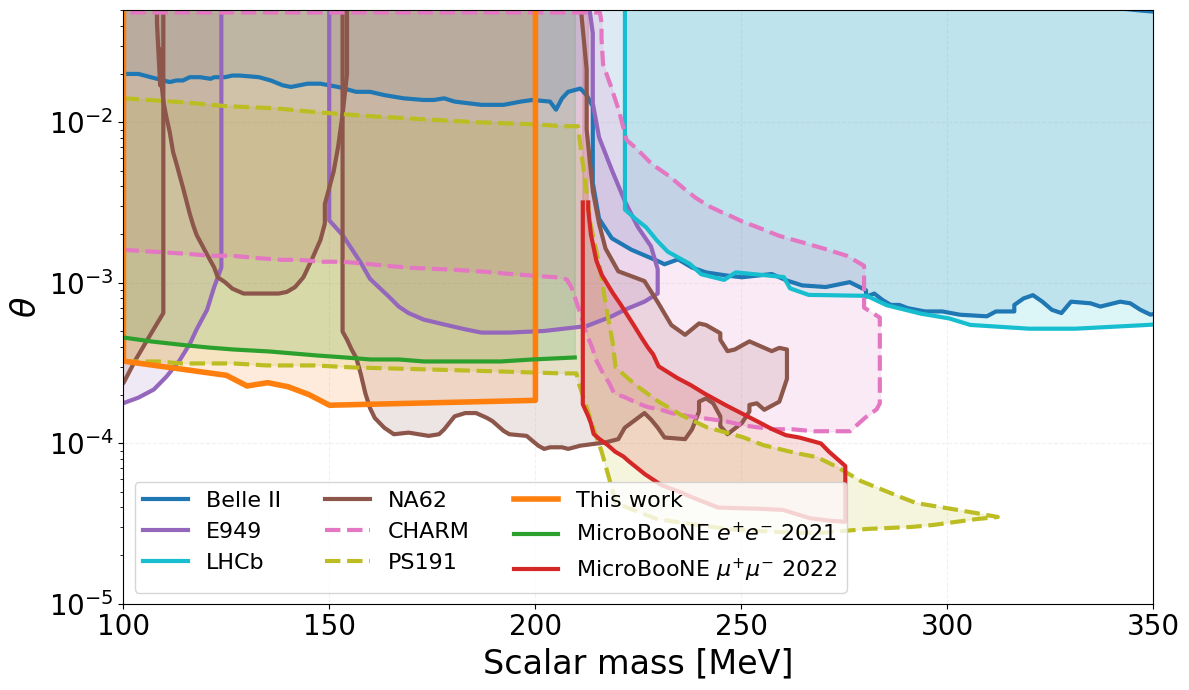

In [6]:
plt.figure(figsize=(12,7),facecolor='white',dpi=100)

# plt.plot(Belle_reduced['Mass'],Belle_reduced['Value'],label=r"Belle II",color="C1",lw=3)
# plt.fill_between(Belle_reduced['Mass'],Belle_reduced['Value'],1,color="C1",alpha=0.15)

plt.plot(Belle_full['Mass'],Belle_full['Value'],label=r"Belle II",color="C10",lw=3)
plt.fill_between(Belle_full['Mass'],Belle_full['Value'],1,color="C10",alpha=0.15)

plt.plot(E949_p1_ones['Mass'],E949_p1_ones['Value'],label=r"E949",color="C4",lw=3)
plt.fill_between(E949_p1_ones['Mass'],E949_p1_ones['Value'],1,color="C4",alpha=0.15)

plt.plot(E949_p2_ones['Mass'],E949_p2_ones['Value'],color="C4",lw=3)
plt.fill_between(E949_p2_ones['Mass'],E949_p2_ones['Value'],1,color="C4",alpha=0.15)

plt.plot(LHCb_Owen_ones['Mass'],(LHCb_Owen_ones['Value']),label=r"LHCb",color="C9",lw=3)
plt.fill_between(LHCb_Owen_ones['Mass'],(LHCb_Owen_ones['Value']),1,color="C9",alpha=0.15)

plt.plot(NA62_p1['Mass'],(NA62_p1['Value']),label=r"NA62",color="C5",lw=3)
plt.fill_between(NA62_p1['Mass'],(NA62_p1['Value']),1,color="C5",alpha=0.15)
plt.plot(NA62_p2_sorted['Mass'],(NA62_p2_sorted['Value']),color="C5",lw=3)
plt.fill_between(NA62_p2_sorted['Mass'],(NA62_p2_sorted['Value']),1,color="C5",alpha=0.15)
plt.plot(NA62_p3['Mass'],(NA62_p3['Value']),color="C5",lw=3)
plt.fill_between(NA62_p3['Mass'],(NA62_p3['Value']),1,color="C5",alpha=0.15)

# plt.plot(LHCb_p1['Mass'],np.sqrt(LHCb_p1['Value']),label=r"LHCb",color="C6",lw=3)
# plt.fill_between(LHCb_p1['Mass'],np.sqrt(LHCb_p1['Value']),1,color="C6",alpha=0.15)



plt.plot(CHARM_from_Owen['Mass'],(CHARM_from_Owen['Value']),label=r"CHARM",color="C6",lw=3,ls="dashed")
plt.fill_between(CHARM_from_Owen['Mass'],(CHARM_from_Owen['Value']),1,color="C6",alpha=0.15) 

# plt.plot(LSND_ee['Mass'],np.sqrt(LSND_ee['Value']),label=r"LSND",color="C7",lw=3,ls="dashed")
# plt.fill_between(LSND_ee['Mass'],np.sqrt(LSND_ee['Value']),1,color="C7",alpha=0.15)
# plt.plot(LSND_mumu['Mass'],np.sqrt(LSND_mumu['Value']),color="C7",lw=3,ls="dashed")
# plt.fill_between(LSND_mumu['Mass'],np.sqrt(LSND_mumu['Value']),1,color="C7",alpha=0.15)

plt.plot(PS191['Mass'],(PS191['Value']),label=r"PS191",color="C8",lw=3,ls="dashed")
plt.fill_between(PS191['Mass'],(PS191['Value']),1,color="C8",alpha=0.15)

plt.plot(uboone_NEW_ones['Mass'],uboone_NEW_ones['Value'],label=r"This work",color="C1",lw=4)
plt.fill_between(uboone_NEW_ones['Mass'],uboone_NEW_ones['Value'],1,color="C1",alpha=0.15)

plt.plot(uboone_2021['Mass'],uboone_2021['Value'],label=r"MicroBooNE $e^{+}e^{-}$ 2021",color="C2",lw=3)
plt.fill_between(uboone_2021['Mass'],uboone_2021['Value'],1,color="C2",alpha=0.15) #uboone_mumu

plt.plot(uboone_mumu_theta_squared['Mass'],(uboone_mumu_theta_squared['Value']),label=r"MicroBooNE $\mu^{+}\mu^{-}$ 2022",color="C3",lw=3)
plt.fill_between(uboone_mumu_theta_squared['Mass'],(uboone_mumu_theta_squared['Value']),1,color="C3",alpha=0.15)



plt.xlabel(r'Scalar mass [MeV]',fontsize=24)
plt.ylabel(r'$\theta$',fontsize=24)
# plt.xticks([0, 50, 100, 150, 200, 245])
# plt.legend()
plt.ylim(1e-5,5e-2) #2e-9
plt.xlim(100,350)
plt.grid(ls='--',color='C7',alpha=0.1)
plt.yscale('log')
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.legend(prop={'size': 16}, loc="lower left",ncol=3)

plt.tight_layout()

name = f"Edited_Reinterp_HPS_limit_comparison_plot"

savefig = input(f"Do you want to save the figure as {name}? y/n")

if savefig == "y":
    plt.savefig(root_dir+'Plots/Limits/'+name+'.pdf',bbox_inches='tight', pad_inches=0.3)
    plt.savefig(root_dir+'Plots/Limits/'+name+'.png',bbox_inches='tight', pad_inches=0.3)
plt.show()


## Comparing Run 1 & Run3, KDIF & KDAR, and 1shr & 2shr sensitivity

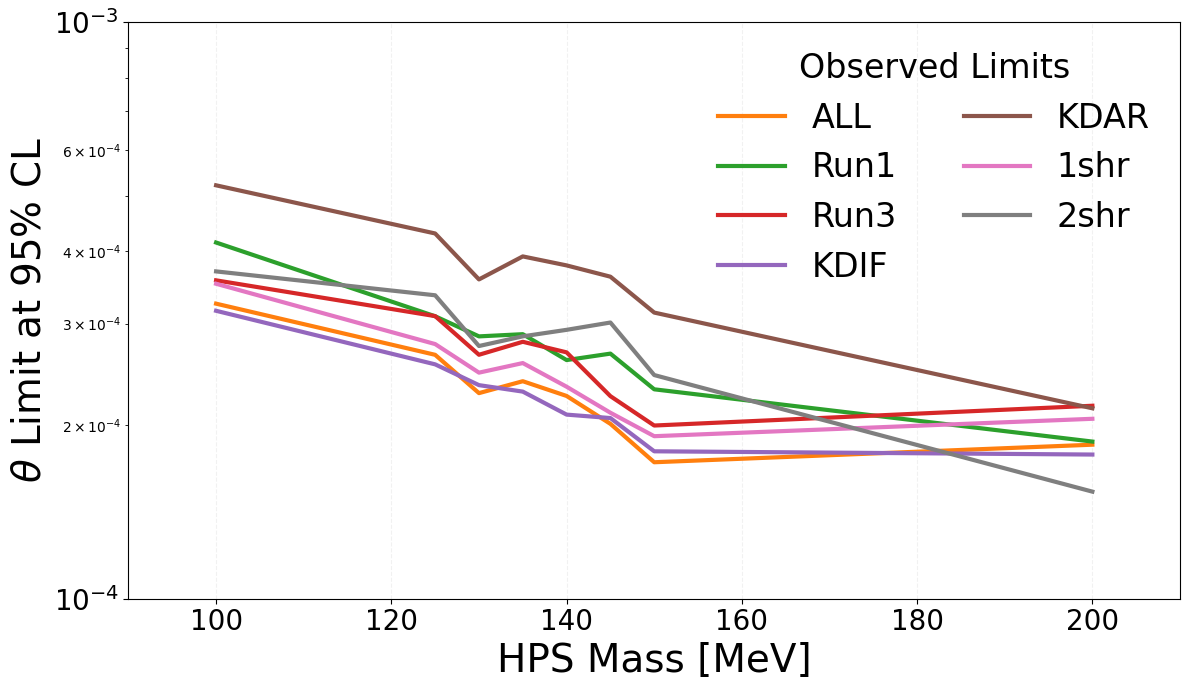

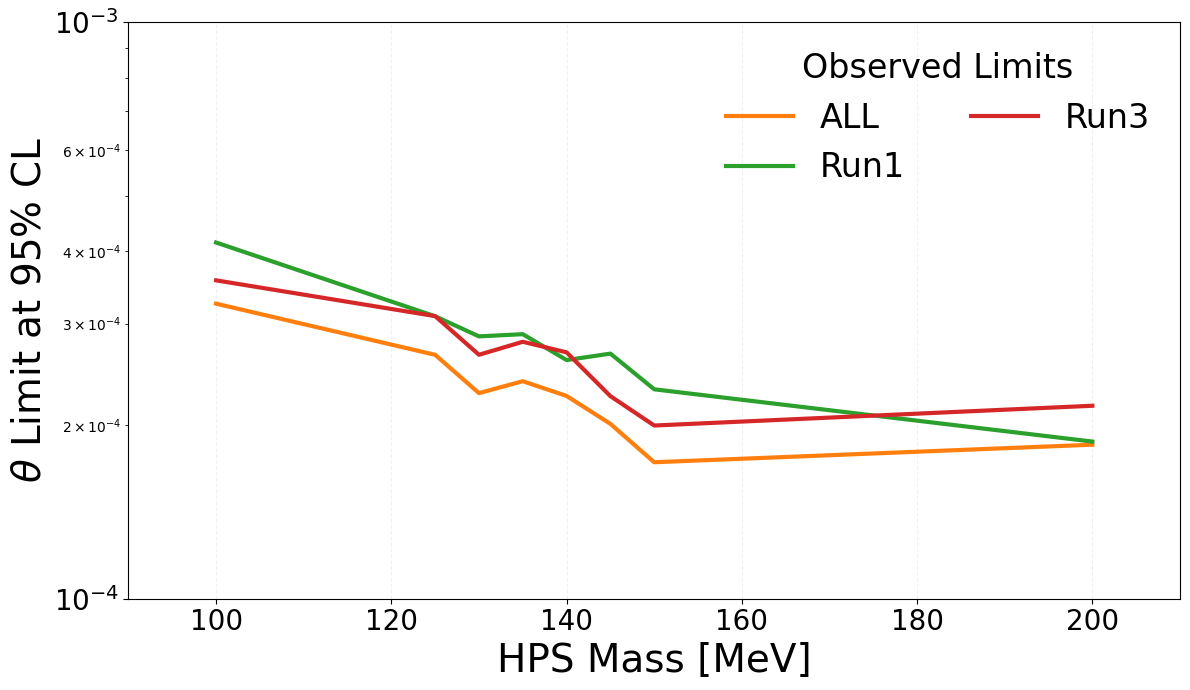

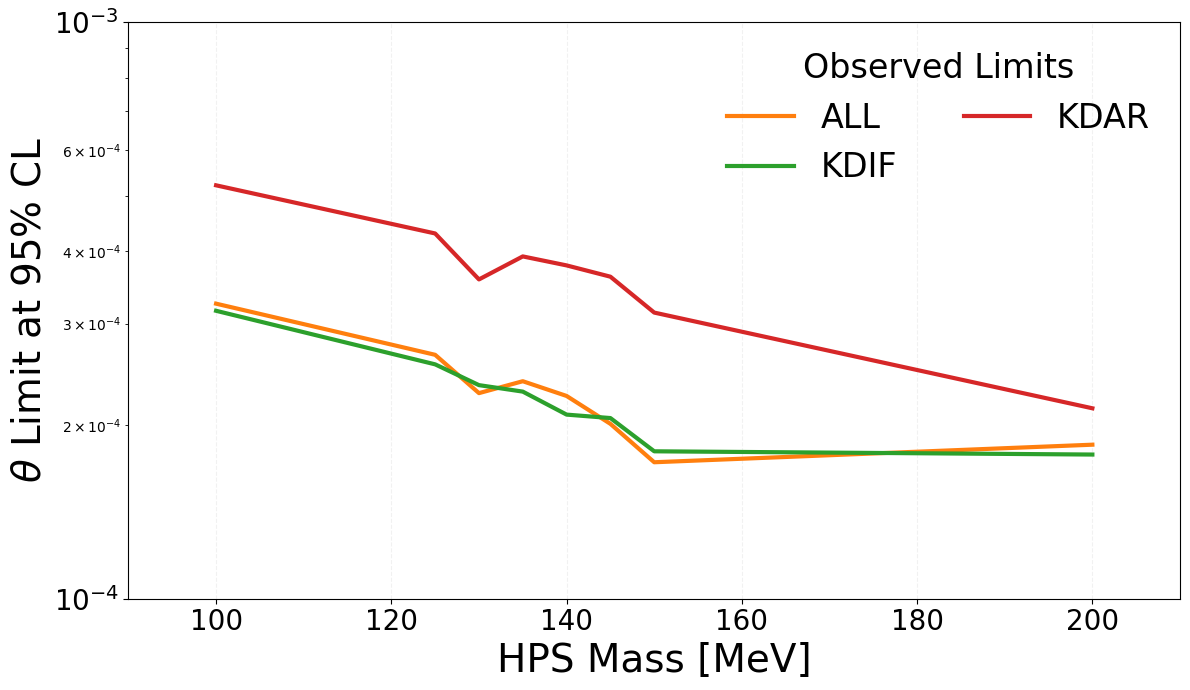

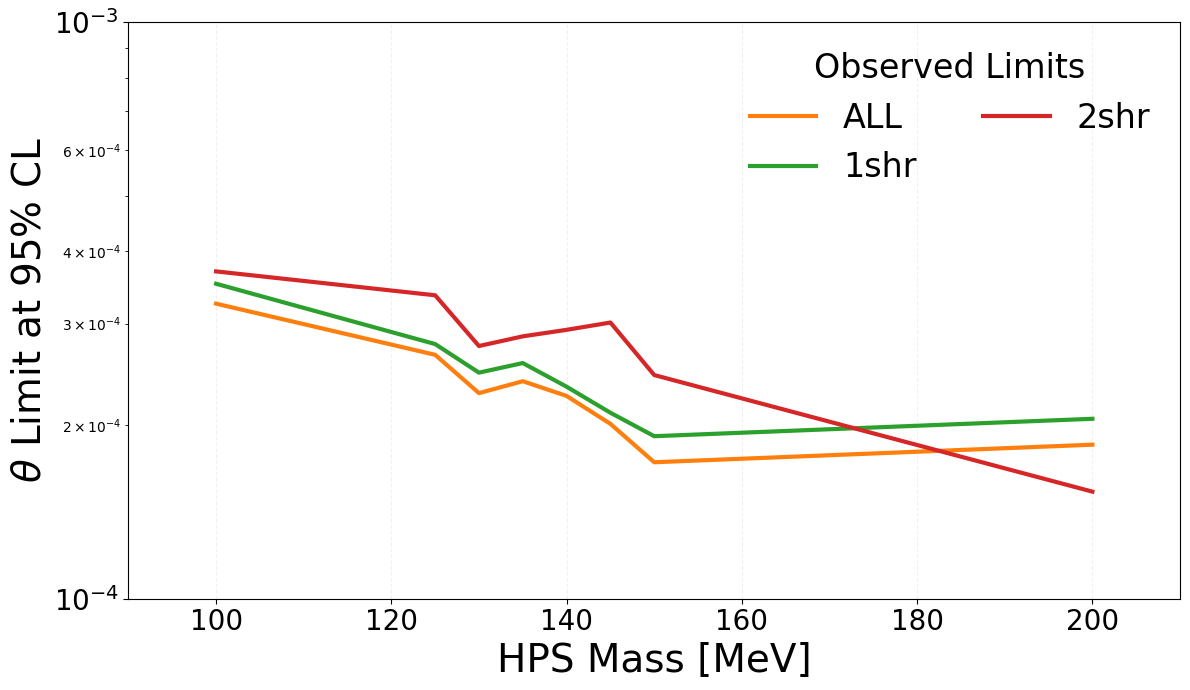

In [7]:
label_combos = [[ 'ALL', 'Run1', 'Run3', 'KDIF', 'KDAR', '1shr', '2shr'], [ 'ALL', 'Run1', 'Run3'], [ 'ALL', 'KDIF', 'KDAR'], [ 'ALL', '1shr', '2shr']]
data_type = 'obs'
cols = ['Mass','Value']

for labels in label_combos:
    
    list_of_lists = []
    for i in range(len(labels)):
        list_of_lists.append(pd.read_csv(root_dir+f"limit_files/Brazil_plot/{data_type}_limit_{labels[i]}_Capped_HPS_rebinned_limit.csv",names=cols))

    fig, ax1 = plt.subplots(figsize=(12,7),facecolor='white',dpi=100)

    if data_type == 'obs': titlename = "Observed Limits"
    elif data_type == 'exp': titlename = "Expected Limits"

    k=1
    for i in range(len(labels)):     
        ax1.plot(list_of_lists[i]['Mass'],list_of_lists[i]['Value'],label=labels[i],color=f"C{k}",lw=3)
        k+=1

    ax1.set_yscale('log')
    ax1.set_xlim(90,210)
    ax1.set_ylim(1e-4,1e-3)
    ax1.legend(prop={'size': 16}, loc="upper right",ncol=3)
    ax1.grid(ls='--',color='C7',alpha=0.1)

    ax1.set_ylabel(r'$\theta$ Limit at 95% CL',fontsize=28)
    ax1.set_xlabel('HPS Mass [MeV]',fontsize=28)


    name = data_type+f"_HPS_sensitivity_comparison"
    for label in labels:
        name += '_'+label

    savefig = input(f"Do you want to save the figure as {name}? y/n")
    ax1.tick_params(axis='x', labelsize=20)
    ax1.tick_params(axis='y', labelsize=20)

    if titlename != "": ax1.legend(loc="upper right", ncol=2, frameon=False, fontsize=22, prop={'size': 24}, title=titlename, title_fontsize=24)
    fig.tight_layout()

    if savefig == "y":
        plt.savefig(root_dir+'Plots/Limits/'+name+'.pdf',bbox_inches='tight', pad_inches=0.3)
        plt.savefig(root_dir+'Plots/Limits/'+name+'.png',bbox_inches='tight', pad_inches=0.3)
    plt.show()

## Comparing limits 

In [8]:
def Get_sigma_bands(filename, root_path = root_dir, RW = False):
    """
    Load sigma bands for each mass point from .csv files saved above.
    Filename is without the decay type or .csv
    """
    to_load_names = ["exp_1sig_up","exp_1sig_down","exp_2sig_up","exp_2sig_down","exp_limit","obs_limit"]
    loaded_lists = []
    for i, name in enumerate(to_load_names):
        if RW:
            full_path = root_path+f"limit_files/RW_Brazil_plot/{name}_{filename}.csv"
        else:
            full_path = root_path+f"limit_files/Brazil_plot/{name}_{filename}.csv"
        if(os.path.exists(full_path)):
            with open(full_path, "r") as fp:   # Unpickling
                reader = csv.reader(fp)
                loaded_list = list(reader)
                loaded_lists.append(loaded_list)
                
    return loaded_lists

def Make_dicts_for_limits(loaded_lists):
    """
    Takes output of Get_sigma_bands and translates to dict with HNL masses as keys.
    """
    to_load_names = ["exp_1sig_up","exp_1sig_down","exp_2sig_up","exp_2sig_down","exp_limit","obs_limit"]
    lims_dict = {}
    for i, exp_lim_list in enumerate(loaded_lists[0]):
        # if isinstance(exp_lim_list[0], str):
        HNL_mass = int(exp_lim_list[0])
        # else: HNL_mass = exp_lim_list[0]
        individual_lims = {}
        for j, lims in enumerate(loaded_lists):
            individual_lims[to_load_names[j]] = float(loaded_lists[j][i][1])
        lims_dict[int(HNL_mass)] = individual_lims
    
    return lims_dict

def Make_list_limits(loaded_lists):
    """
    Takes output of Get_sigma_bands and translates to dict with lists of limit vals.
    """
    to_load_names = ["exp_1sig_up","exp_1sig_down","exp_2sig_up","exp_2sig_down","exp_limit","obs_limit"]
    lims_dict = {}
    for i, exp_lim_list in enumerate(loaded_lists):
        lims_list, mass_list = [], []
        for j, val in enumerate(exp_lim_list):
            lims_list.append(float(val[1]))
            mass_list.append(int(val[0]))
        
        lims_dict[to_load_names[i]] = lims_list
    
    return lims_dict, mass_list



def compare_limits(data_types, limit_to_compare, data_labels = [], use_observed = True):
    """
    data_types = array of length 2, containing the data prefix, such as 'ALL', 'stat_ALL', 'Run1', etc. 
    limit_to_compare = string of the defining which limit to compare between the two data_types
    """

    cols = ['Mass','Value']
    root_file = "_Capped_HPS_rebinned_limit"
    
    filenames = [f"{data_type}{root_file}" for data_type in data_types]

    

    REWEIGHTING = False

    limits_arr = []
    for filename in filenames:
        ee_loaded_test = Get_sigma_bands(filename, RW=REWEIGHTING)
        ee_limits_dict = Make_dicts_for_limits(ee_loaded_test)

        ee_lims_dict, ee_mass_list = Make_list_limits(ee_loaded_test)
        limits_arr.append([ee_lims_dict, ee_mass_list])


    lengths = [len(limit[1]) for limit in limits_arr]
    
    if lengths.count(lengths[0]) != len(lengths):
        if len(lengths) == 2:
            print("The mass lists are not the same length, attempting to match mass points.")

            limits_arr[0], limits_arr[1] = match_mass_points(limits_arr[0], limits_arr[1]) 
            
            
            if len(limits_arr[0][1]) != len(limits_arr[1][1]):
                print("Trying with a smaller subset of mass points.")
                limits_arr[0], limits_arr[1] = match_mass_points(limits_arr[0], limits_arr[1]) 
                if len(limits_arr[0][1]) != len(limits_arr[1][1]):
                    print("Mass points matching was unsuccessful.")
                    return
            
            print("Mass points matched successfully.")

        else:
            print("The mass lists are not the same length, try reducing the number of limits compared.")
        



    titlename = r"MicroBooNE Data $7.01\times10^{20}$ POT"

    fig,ax = plt.subplots(nrows=2, ncols=1, sharex=True, gridspec_kw={'height_ratios': [3, 1]}, figsize=(14,14),dpi=100)
    plt.sca(ax[0])

    colours = [
        ['black','red', 'yellow', 'lightgreen'],
        ['blue','orange', 'lightblue', 'lightcoral'],
        ['violet', 'green', 'lightgreen', 'pink'],
    ]
    i=0
    for ee_lims_dict, ee_mass_list in limits_arr:
        if len(data_labels) == 0:
            data = data_types[i]
        elif len(data_labels) == len(limits_arr):
            data = ""
        else: 
            print("Label arr length should match data types length.\nRunning with default labels.")
            data = data_types[i]

        HNL_masses=ee_mass_list

        plt.plot(HNL_masses,np.array(ee_lims_dict['obs_limit']),lw=4,ls='-',marker='o',color=colours[i][0],label=data+' Observed')
        plt.plot(HNL_masses,np.array(ee_lims_dict['exp_limit']),lw=2,ls='--',color=colours[i][1],label=data+' Expected')
        plt.fill_between(HNL_masses,np.array(ee_lims_dict['exp_1sig_down']),np.array(ee_lims_dict['exp_1sig_up']),color=colours[i][2],label=data+r' Exp. 1$\sigma$',alpha=0.5)
        plt.fill_between(HNL_masses,np.array(ee_lims_dict['exp_2sig_down']),np.array(ee_lims_dict['exp_2sig_up']),color=colours[i][3],label=data+r' Exp. 2$\sigma$',alpha=0.5)
        
        i+=1

    plt.ylabel(r'$\theta$ Limit at 95% CL',fontsize=28)
    plt.xlabel('HPS Mass [MeV]',fontsize=28)


    # plt.text(0.99,0.95,r'MicroBooNE NuMI POT:$7.01\times 10^{20}$',fontsize=20,color='black',alpha=1,verticalalignment='top',horizontalalignment='right',transform=plt.gca().transAxes)
    plt.tick_params(axis='x', labelsize=24)
    plt.tick_params(axis='y', labelsize=24, which="major", length=10)
    plt.tick_params(axis='y', labelsize=24, which="minor", length=6)
    plt.ylim(5e-5,1e-3)
    # plt.xlim(0,250)
    plt.yscale('log')


   
    if len(data_labels) == 2:
            h, l = ax[0].get_legend_handles_labels()
            data = ""
            ph = [plt.plot([],marker="", ls="")[0]]*2
            handles = ph + h
            
            # handles = ph[:1] + h[::2] + ph[1:] + h[1::2]
            # labels = [labels[0]] + l[::2] + [labels[1]] + l[1::2]

            n = len(h) // 2

            # Rearrange the handles and labels
            handles = ph[:1] + h[:n-2] + h[n-2:n] + ph[1:] + h[n:-2] + h[-2:]
            # ['flux scaled', ' Exp. 1$\\sigma$', ' Exp. 2$\\sigma$', ' Observed', ' Expected', 'standard', ' Exp. 1$\\sigma$', ' Exp. 2$\\sigma$', ' Observed', ' Expected']
            labels = [data_labels[0]] + l[:n-2] + l[n-2:n] + [data_labels[1]] + l[n:-2] + l[-2:]
            
            leg = plt.legend(handles, labels, loc="upper right", ncol=len(limits_arr), frameon=False, fontsize=int(22*2/len(limits_arr)), prop={'size': int(24*2/len(limits_arr))}, title=titlename, title_fontsize=24)

            for vpack in leg._legend_handle_box.get_children():
                for hpack in vpack.get_children()[:1]:
                    hpack.get_children()[0].set_width(0)
    elif len(data_labels) > 2:
        print("More than 2 labels is not currently supported.")
        plt.legend(loc="upper right",ncol=len(limits_arr),frameon=False,fontsize=int(22*2/len(limits_arr)))
        if titlename != "": plt.legend(loc="upper right", ncol=len(limits_arr), frameon=False, fontsize=int(22*2/len(limits_arr)), prop={'size': int(24*2/len(limits_arr))}, title=titlename, title_fontsize=24)
    else:
        plt.legend(loc="upper right",ncol=len(limits_arr),frameon=False,fontsize=int(22*2/len(limits_arr)))
        if titlename != "": plt.legend(loc="upper right", ncol=len(limits_arr), frameon=False, fontsize=int(22*2/len(limits_arr)), prop={'size': int(24*2/len(limits_arr))}, title=titlename, title_fontsize=24)




    # plt.fill_betweenx(x,y,where=(x>2) & (x<=3), color='b')
    plt.tight_layout()

    plt.sca(ax[1])
    
    baseline_limit = limits_arr[0][0][limit_to_compare]
    
    for j in range(1,len(limits_arr)):

        limit_ratio = np.divide(limits_arr[j][0][limit_to_compare],baseline_limit)
        min_lim = np.min(limit_ratio)
        max_lim = 1+(1-min_lim)

        if len(HNL_masses) == 8:
            bin_widths = [45,5,5,5,5,5,5,95]

        if len(HNL_masses) == 3:
            bin_widths = [50,50,50]

        x_new = []
        y_new = []

        for i, width in enumerate(bin_widths):
            x_new.append(HNL_masses[i]-width/2)
            x_new.append(HNL_masses[i]+width/2)

            y_new.append(limit_ratio[i])
            y_new.append(limit_ratio[i])
        
        if len(data_labels) == 2:
            plt.plot(x_new, y_new, color=colours[j][0], label=data_labels[j])
        else:
            plt.plot(x_new, y_new, color=colours[j][0], label=data_types[j])   


    if len(data_labels) == 2:
        plt.plot(x_new, np.ones(len(x_new)), color='black', ls='--', label="Baseline ({})".format(data_labels[0]))
    else:
        plt.plot(x_new, np.ones(len(x_new)), color='black', ls='--', label="Baseline ({})".format(data_types[0]))

    plt.legend(loc="right", frameon=False, fontsize=int(22*2/len(limits_arr)), prop={'size': int(24*2/len(limits_arr))})
    if limit_to_compare == 'exp_limit':
        limit_label = 'Expected'
    elif limit_to_compare == 'obs_limit':
        limit_label = 'Observed'
    elif limit_to_compare == 'exp_1sig_up':
        limit_label = 'Expected 1$\sigma$ up'
    elif limit_to_compare == 'exp_1sig_down':
        limit_label = 'Expected 1$\sigma$ down'
    elif limit_to_compare == 'exp_2sig_up':
        limit_label = 'Expected 2$\sigma$ up'
    elif limit_to_compare == 'exp_2sig_down':
        limit_label = 'Expected 2$\sigma$ down'



    
    if len(data_labels) != 2:
        plt.ylabel('{} limits ratio '.format(limit_label),fontsize=20)
    else:
        plt.ylabel('{} limits ratio'.format(limit_label), fontsize=20)
    # plt.ylim(min_lim,max_lim)
    plt.xlim(np.min(HNL_masses),np.max(HNL_masses))

    savefig = input("Do you want to save the figures? y/n ")

    savename = "{}_{}_limit_comparison".format(data_types[0], data_types[1])

    if savefig == "y":
        plt.savefig(root_dir+'Plots/Limits/'+savename+'.pdf',bbox_inches='tight', pad_inches=0.3)
        plt.savefig(root_dir+'Plots/Limits/'+savename+'.png',bbox_inches='tight', pad_inches=0.3)

        
        
def match_mass_points(input_1, input_2):

    if len(input_1[1]) > len(input_2[1]):
        input_1, input_2 = input_2, input_1
        swapped = True
    else: swapped = False

    new_dict = {}
    new_arr = []
    

    keys = input_1[0].keys()

    for key in keys:
        new_dict[key] = []

    for i, mass in enumerate(input_2[1]):
        if mass in input_1[1]:
            new_arr.append(mass)
            for key in keys:
                new_dict[key].append(input_2[0][key][i])



    # for i,key in enumerate(input_2[0]):
    #     print(input_1[1])
    #     print(input_2[1][i])
    #     if input_2[1][i] in input_1[1]:
    #         new_dict[key]=input_2[0][key]
    #         new_arr.append(input_2[1][i])

    # print(new_arr)

    input_2 = [new_dict, new_arr]

    if not swapped:
        return input_1, input_2
    else:
        return input_2, input_1

### Comparing old and new flux (Run 3 only)

In [9]:
data_types = ["Run3_KDARScaled","Run3_NewFlux"] 
labels = ['Standard limit (Run 3)', 'New Flux limit (Run 3)']
limit_to_compare = 'obs_limit'

compare_limits(data_types, limit_to_compare, data_labels=labels)

IndexError: list index out of range

### Comparing old vs new KDAR signal scaling

Using 8.0 (8.6) for FHC (RHC) KDAR scaling, vs 5.312 for both FHC & RHC

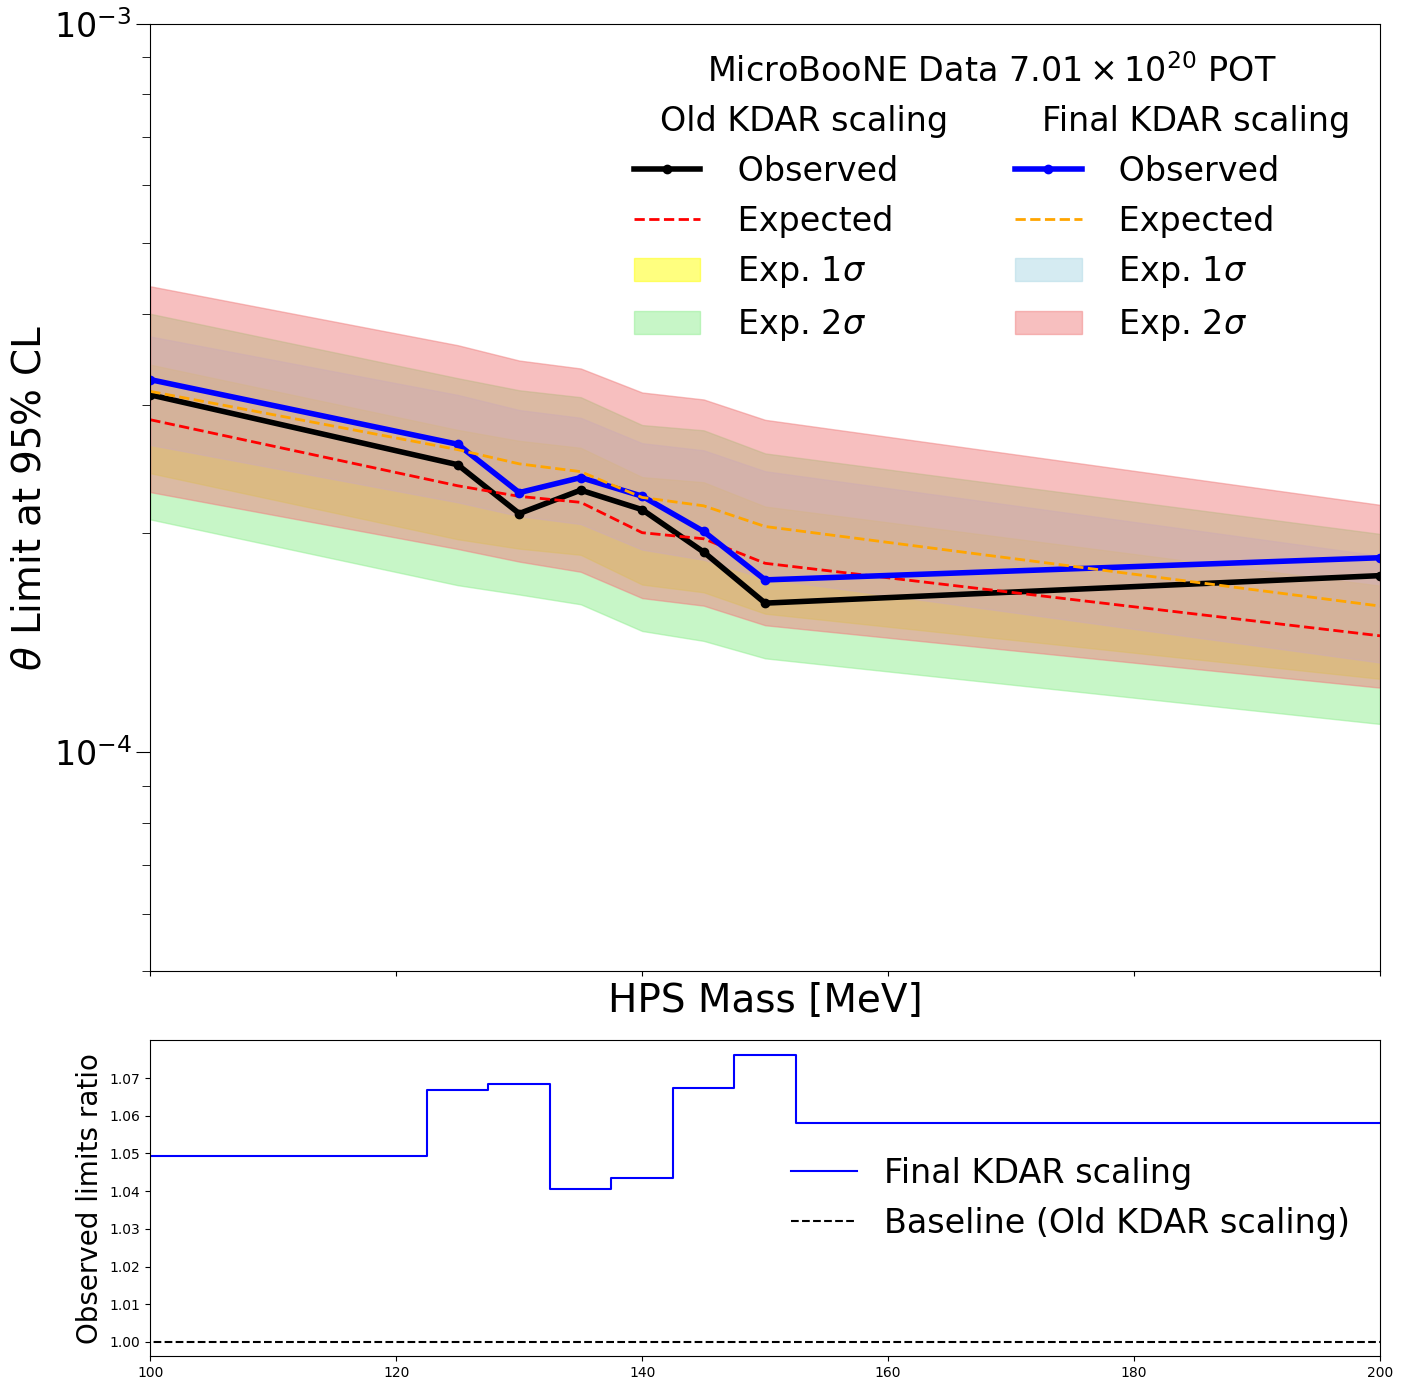

In [10]:
data_types = ["ALL_Old","ALL"] 
labels = ['Old KDAR scaling', 'Final KDAR scaling']
limit_to_compare = 'obs_limit'

compare_limits(data_types, limit_to_compare, data_labels=labels)

### Breaking final scaling down by KDIF/KDAR

More than 2 labels is not currently supported.


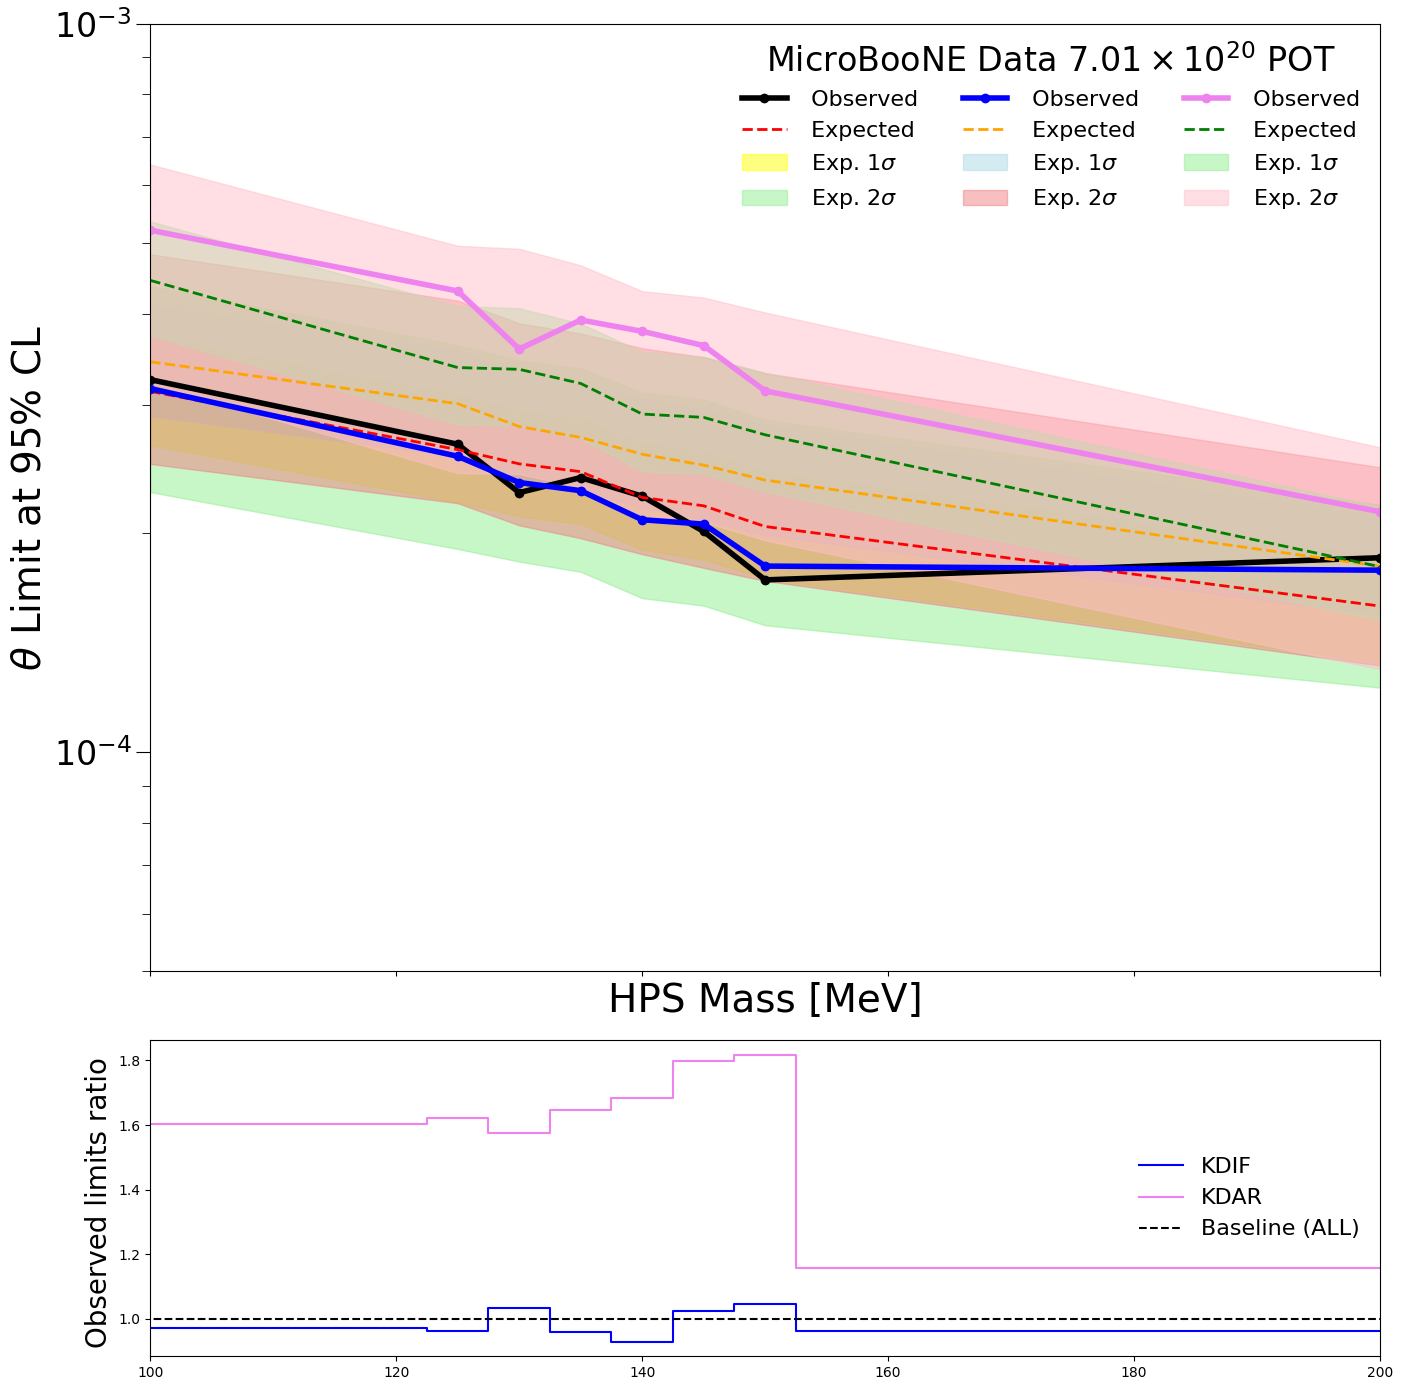

In [11]:
data_types = ["ALL", "KDIF", "KDAR"] 
labels = ['Final scaling', 'KDIF', 'KDAR']
limit_to_compare = 'obs_limit'

compare_limits(data_types, limit_to_compare, data_labels=labels)

### Comparing old model to 0.625 scaled signal

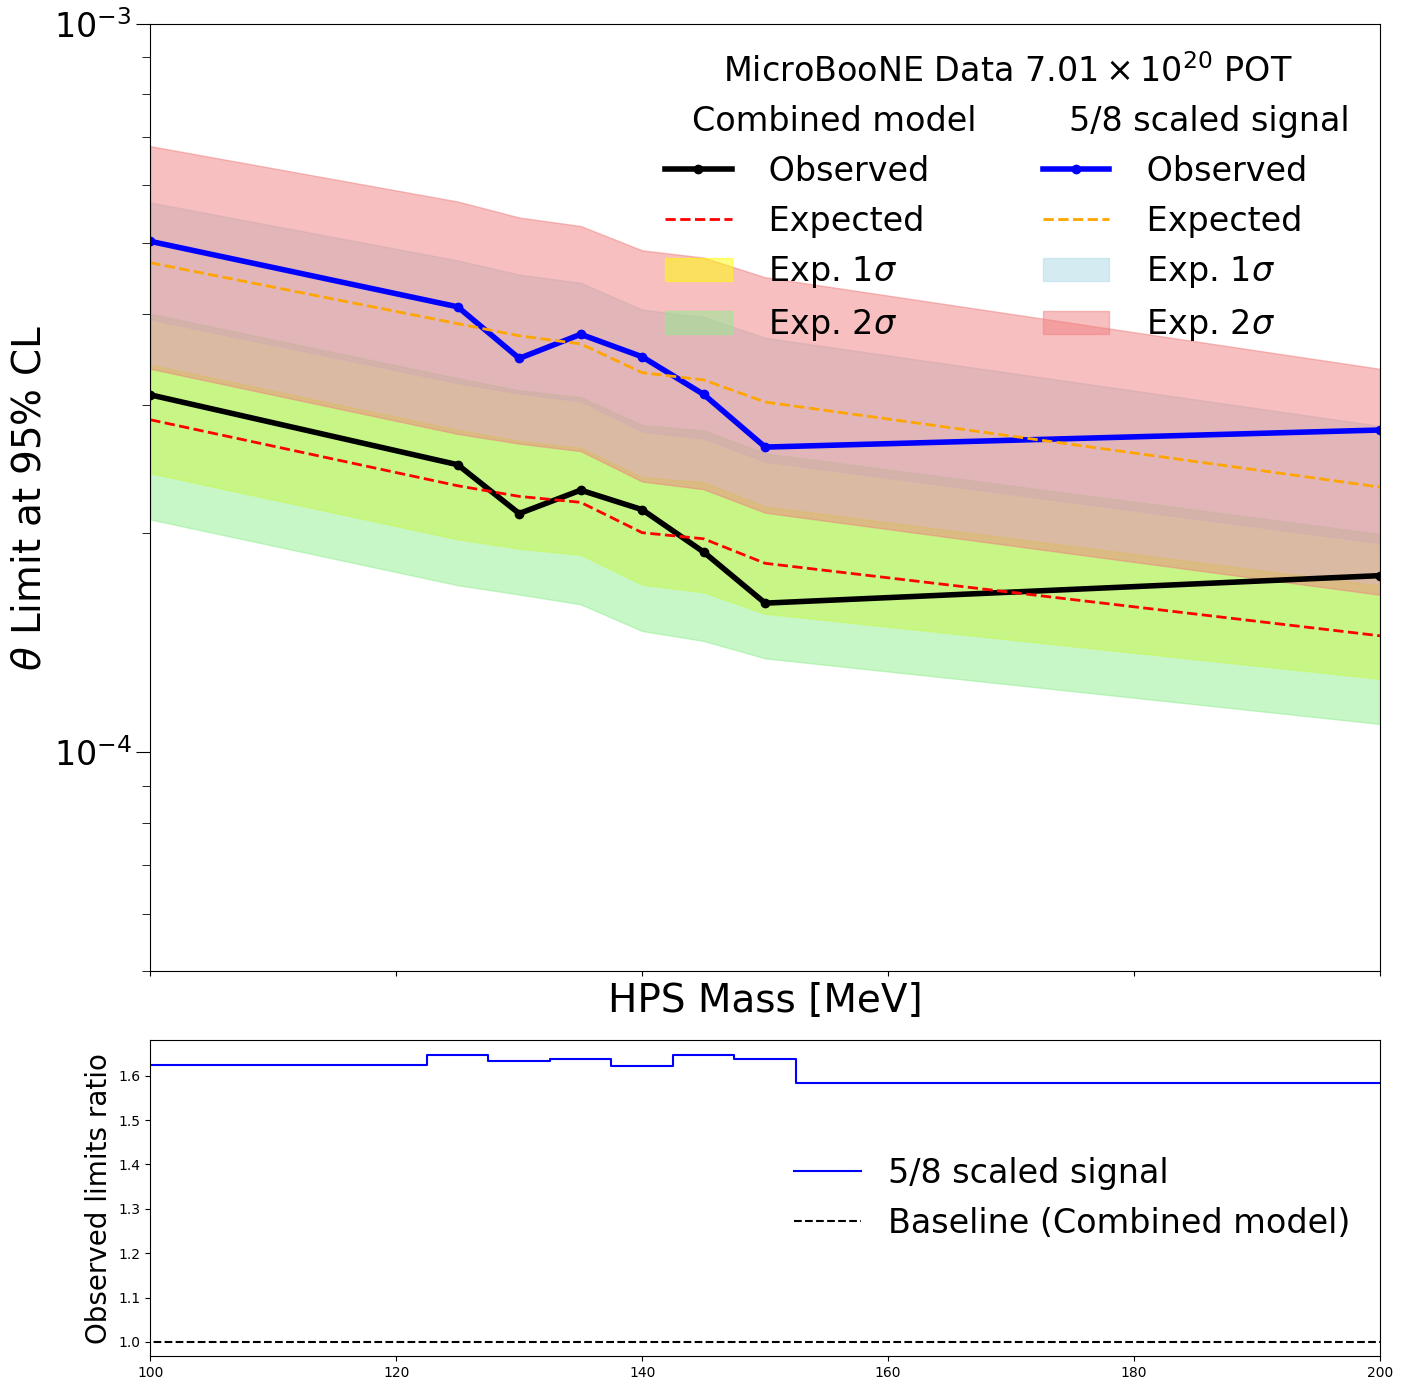

In [12]:
data_types = ["ALL_Old","signal_scaled_0_625_ALL"] 
labels = ['Combined model', '5/8 scaled signal']
limit_to_compare = 'obs_limit'

compare_limits(data_types, limit_to_compare, data_labels=labels)

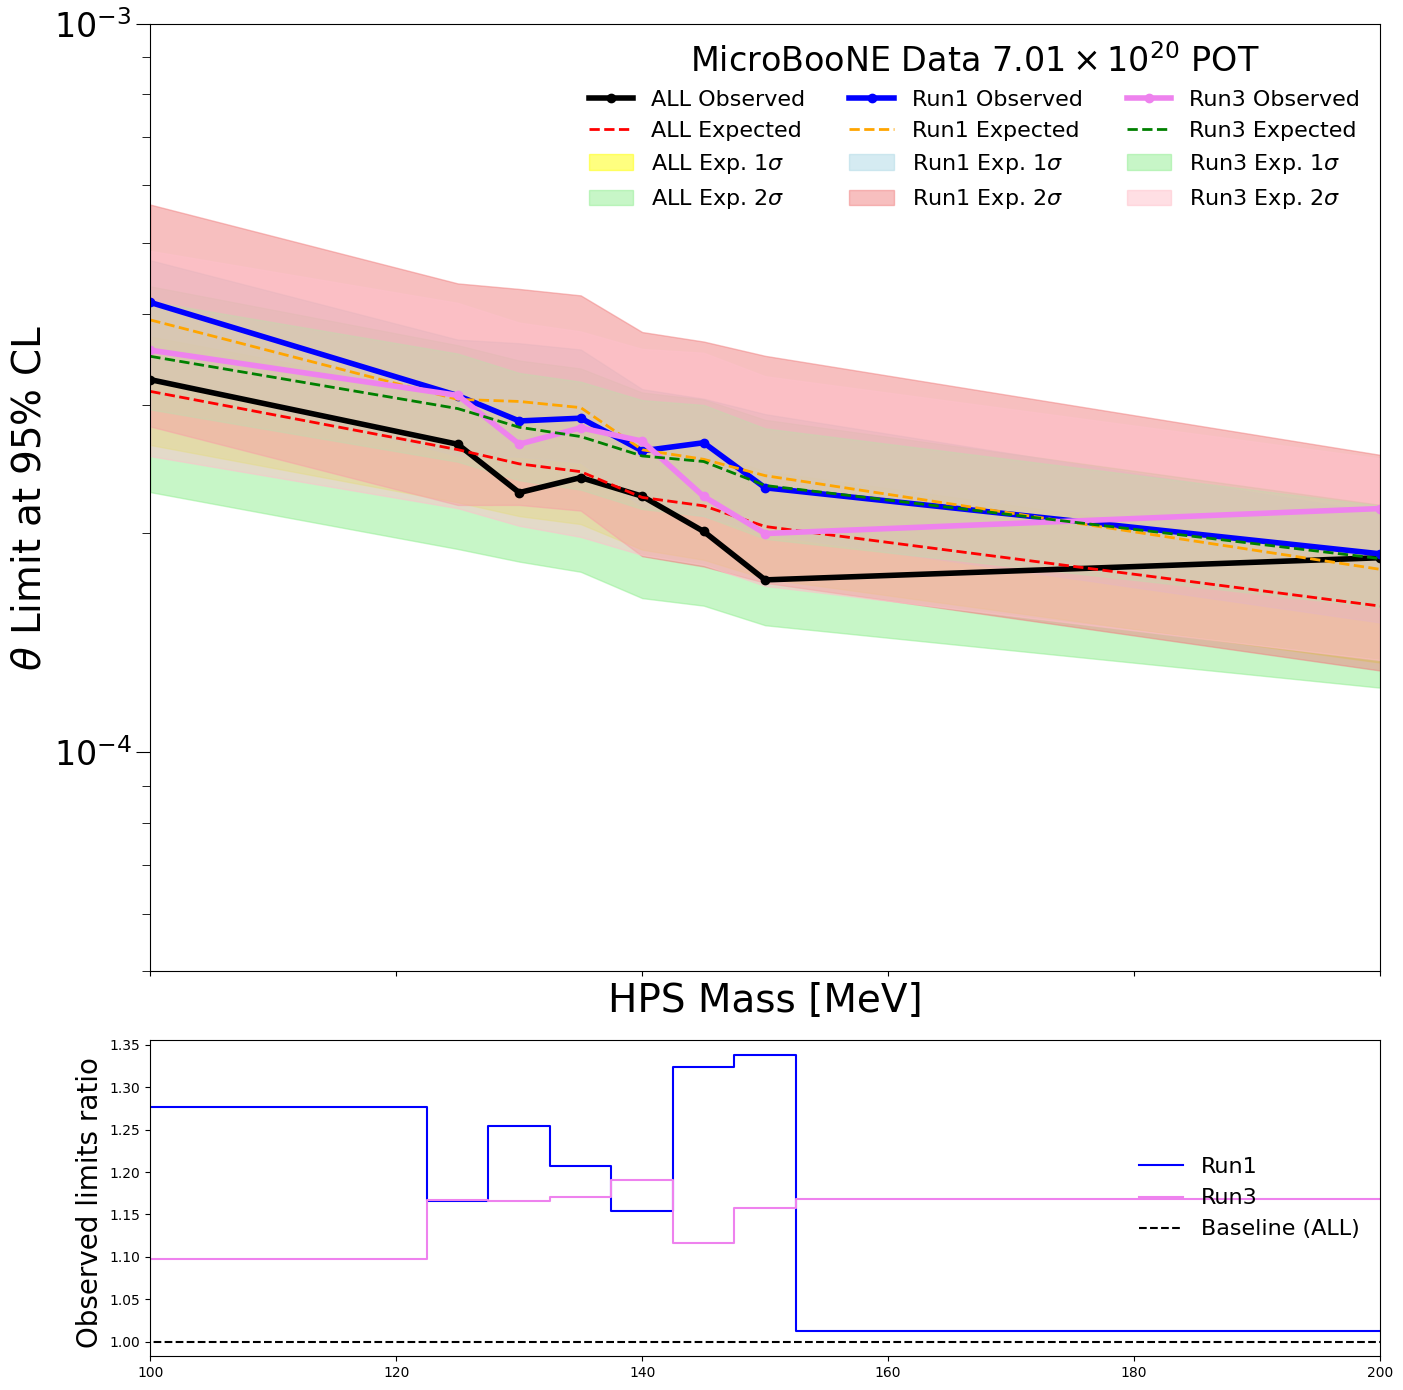

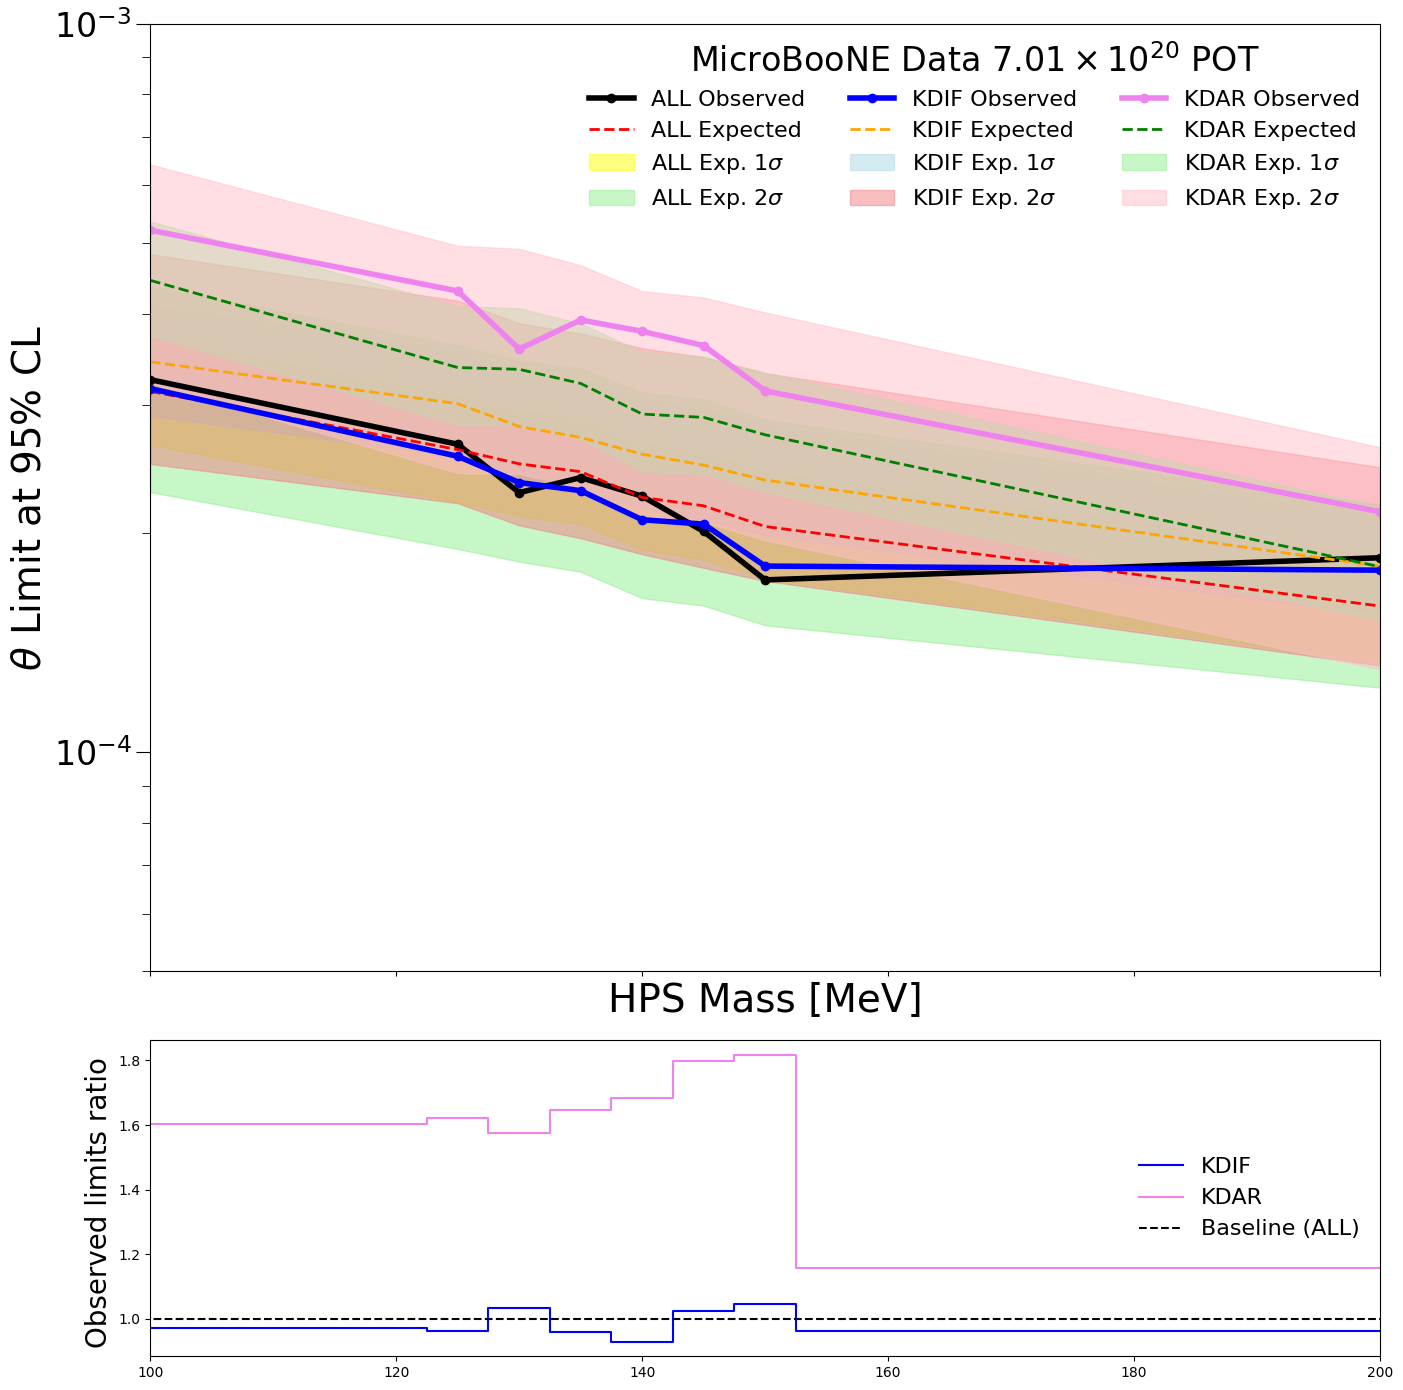

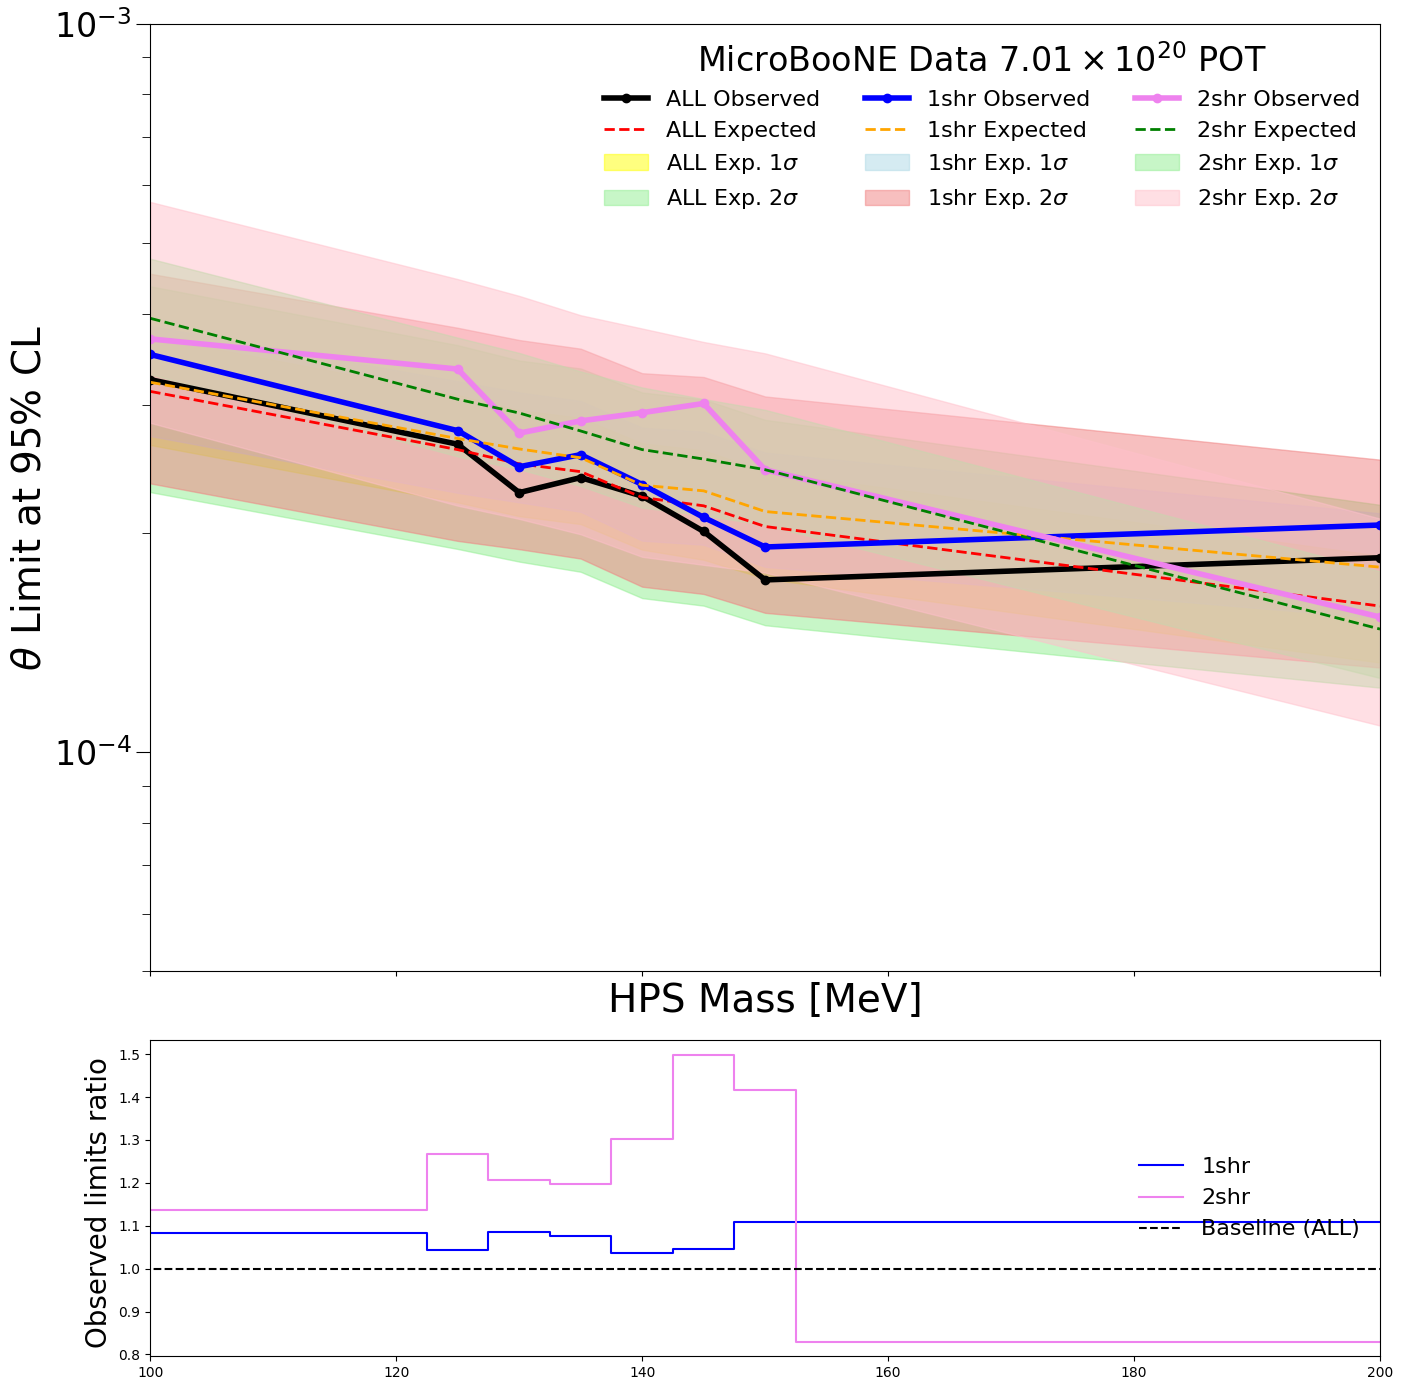

In [13]:

label_combos = [[ 'ALL', 'Run1', 'Run3'], [ 'ALL', 'KDIF', 'KDAR'], [ 'ALL', '1shr', '2shr']]
limit_to_compare = 'obs_limit'
cols = ['Mass','Value']

for labels in label_combos:
    compare_limits(labels, limit_to_compare, use_observed=False)


## Comparing Total to Stats-only Uncertainties

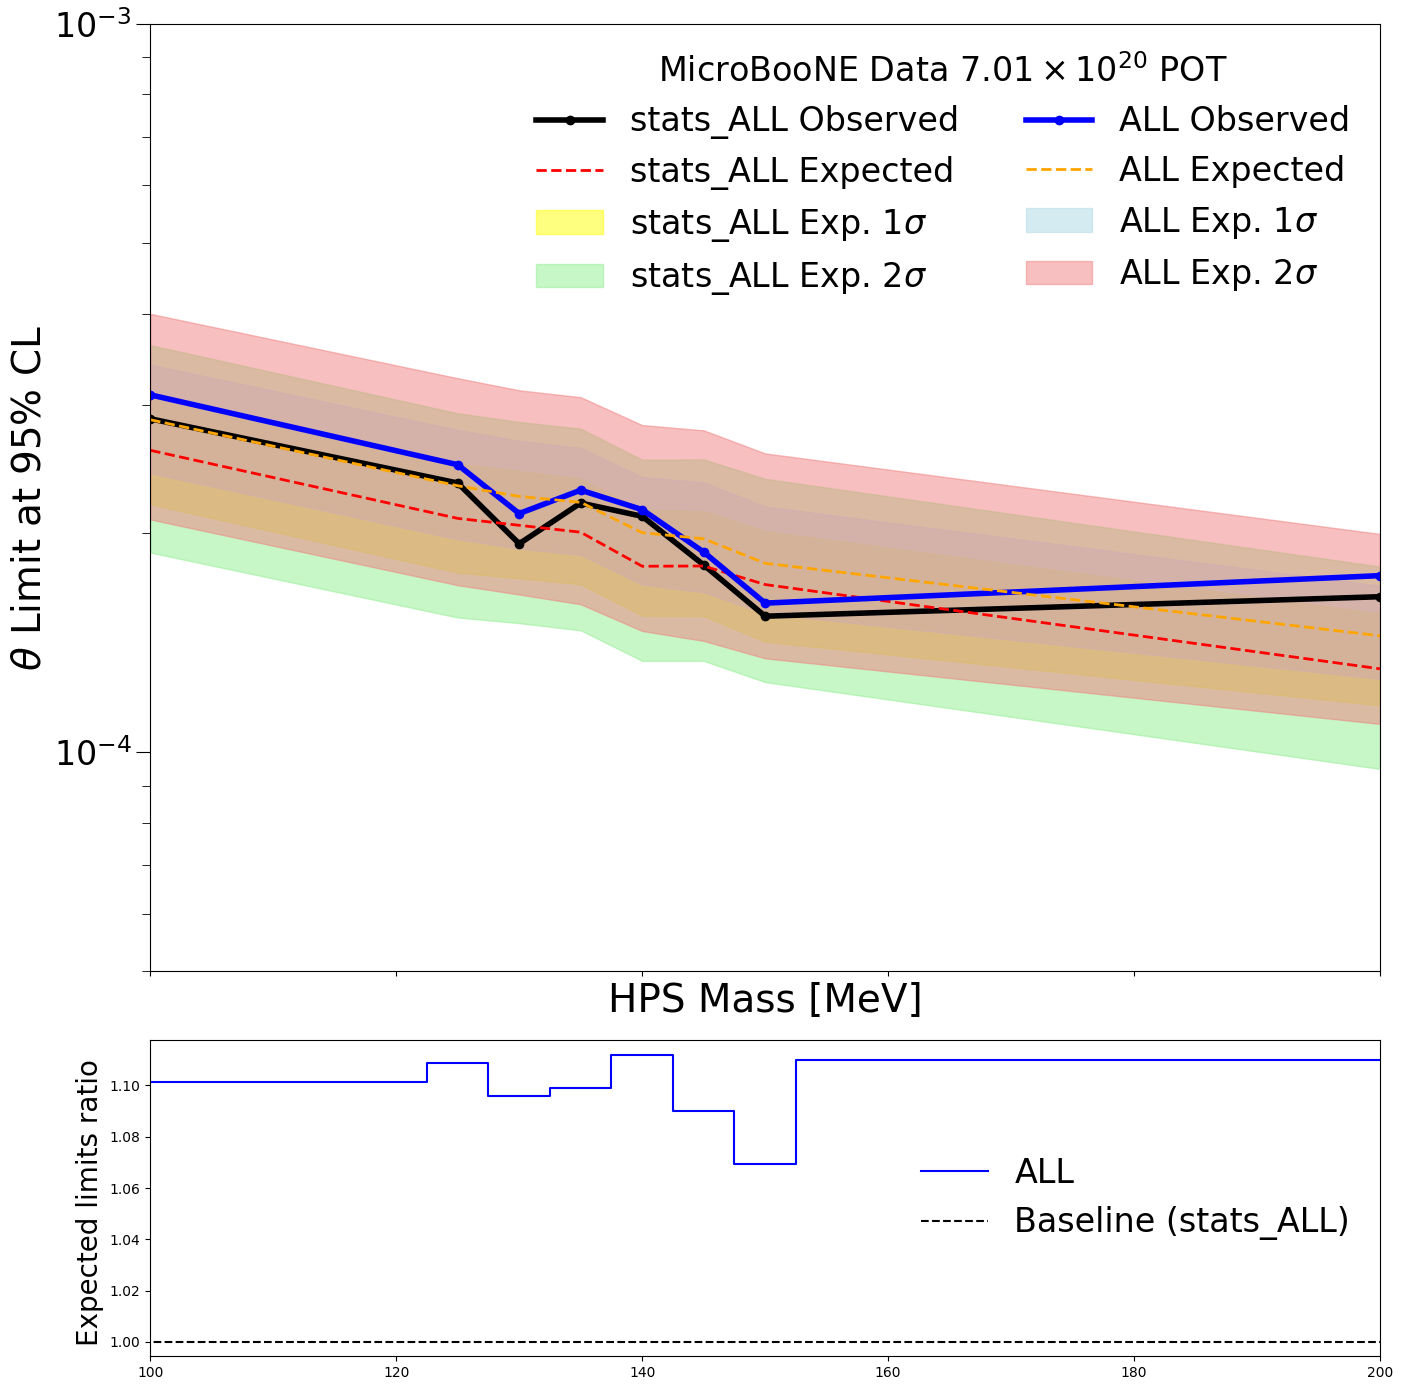

In [11]:
data_types = ["stats_ALL", "ALL"] 
limit_to_compare = 'exp_limit'
compare_limits(data_types, limit_to_compare)

## Comparing ALL & +40% Flux UNCERTAINTY

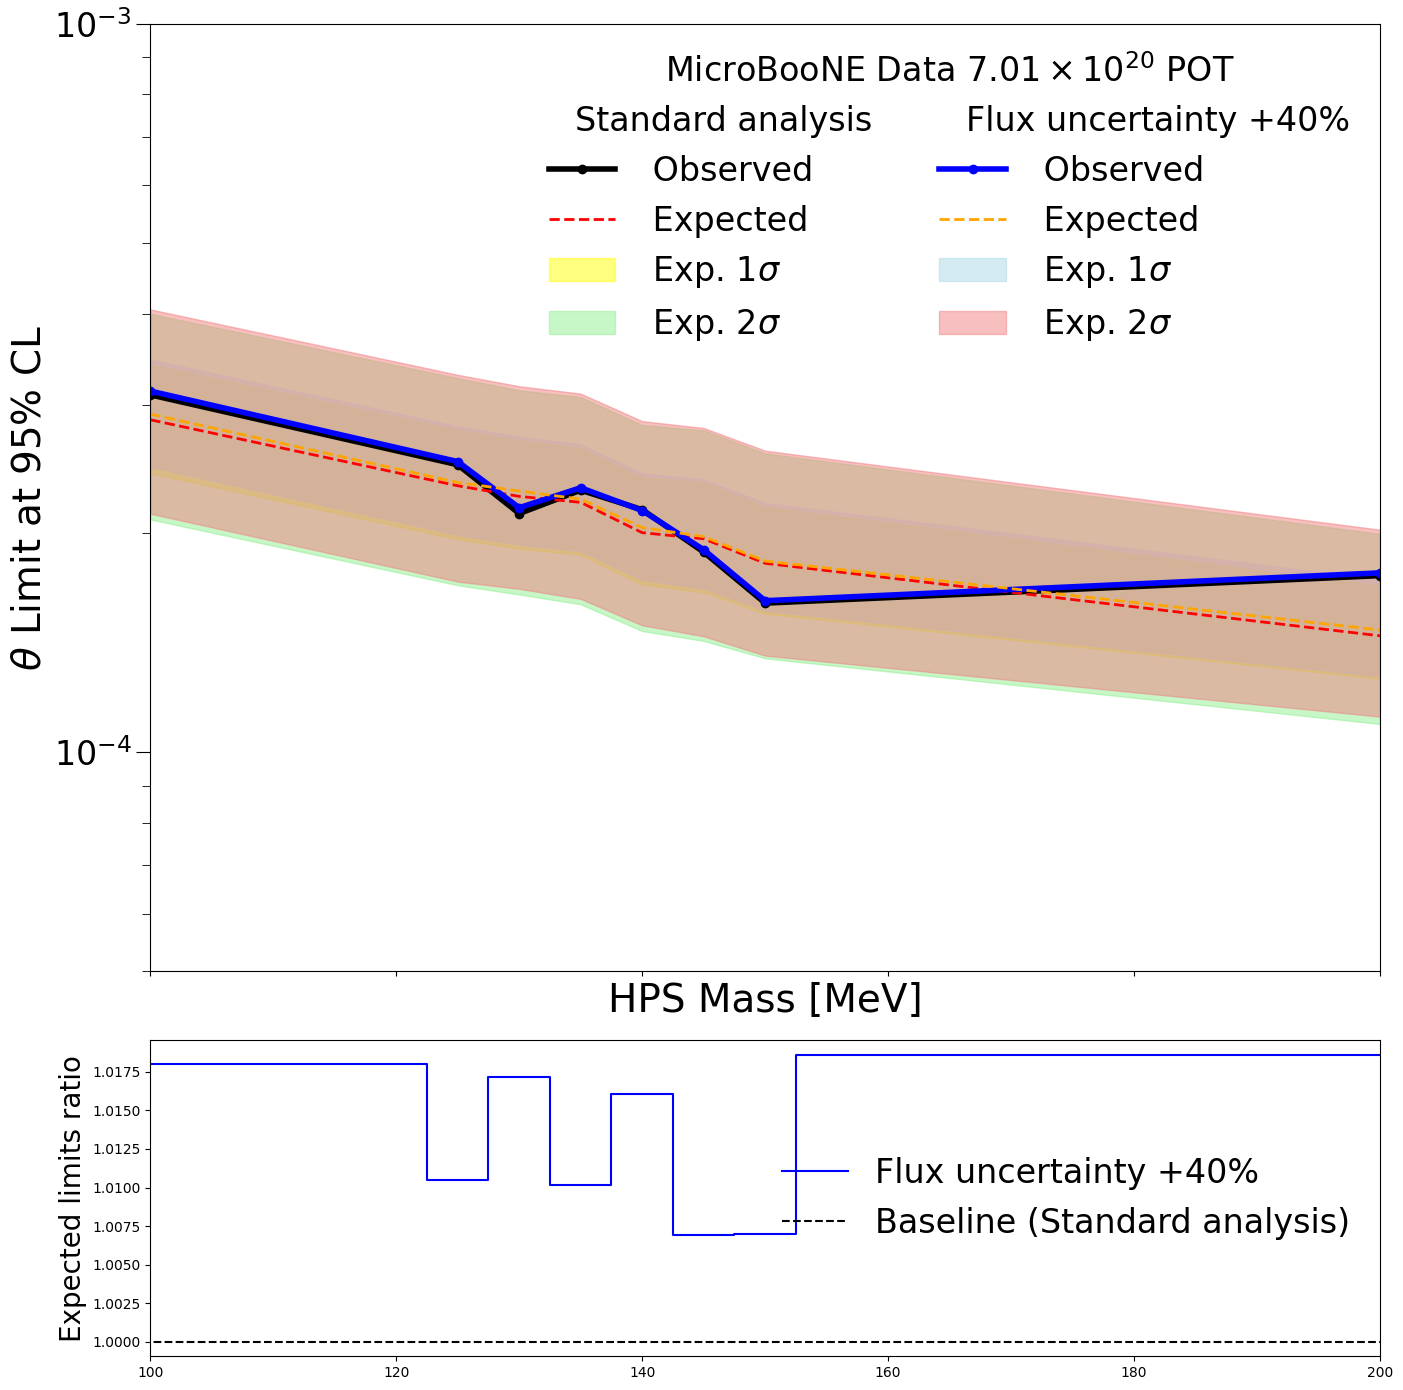

In [12]:
data_types = ["ALL","flux_scaled_ALL", ] 
limit_to_compare = 'exp_limit'
compare_limits(data_types, limit_to_compare, data_labels=['Standard analysis', 'Flux uncertainty +40%', ])

## Compare ALL to +-40% Neutrino Flux

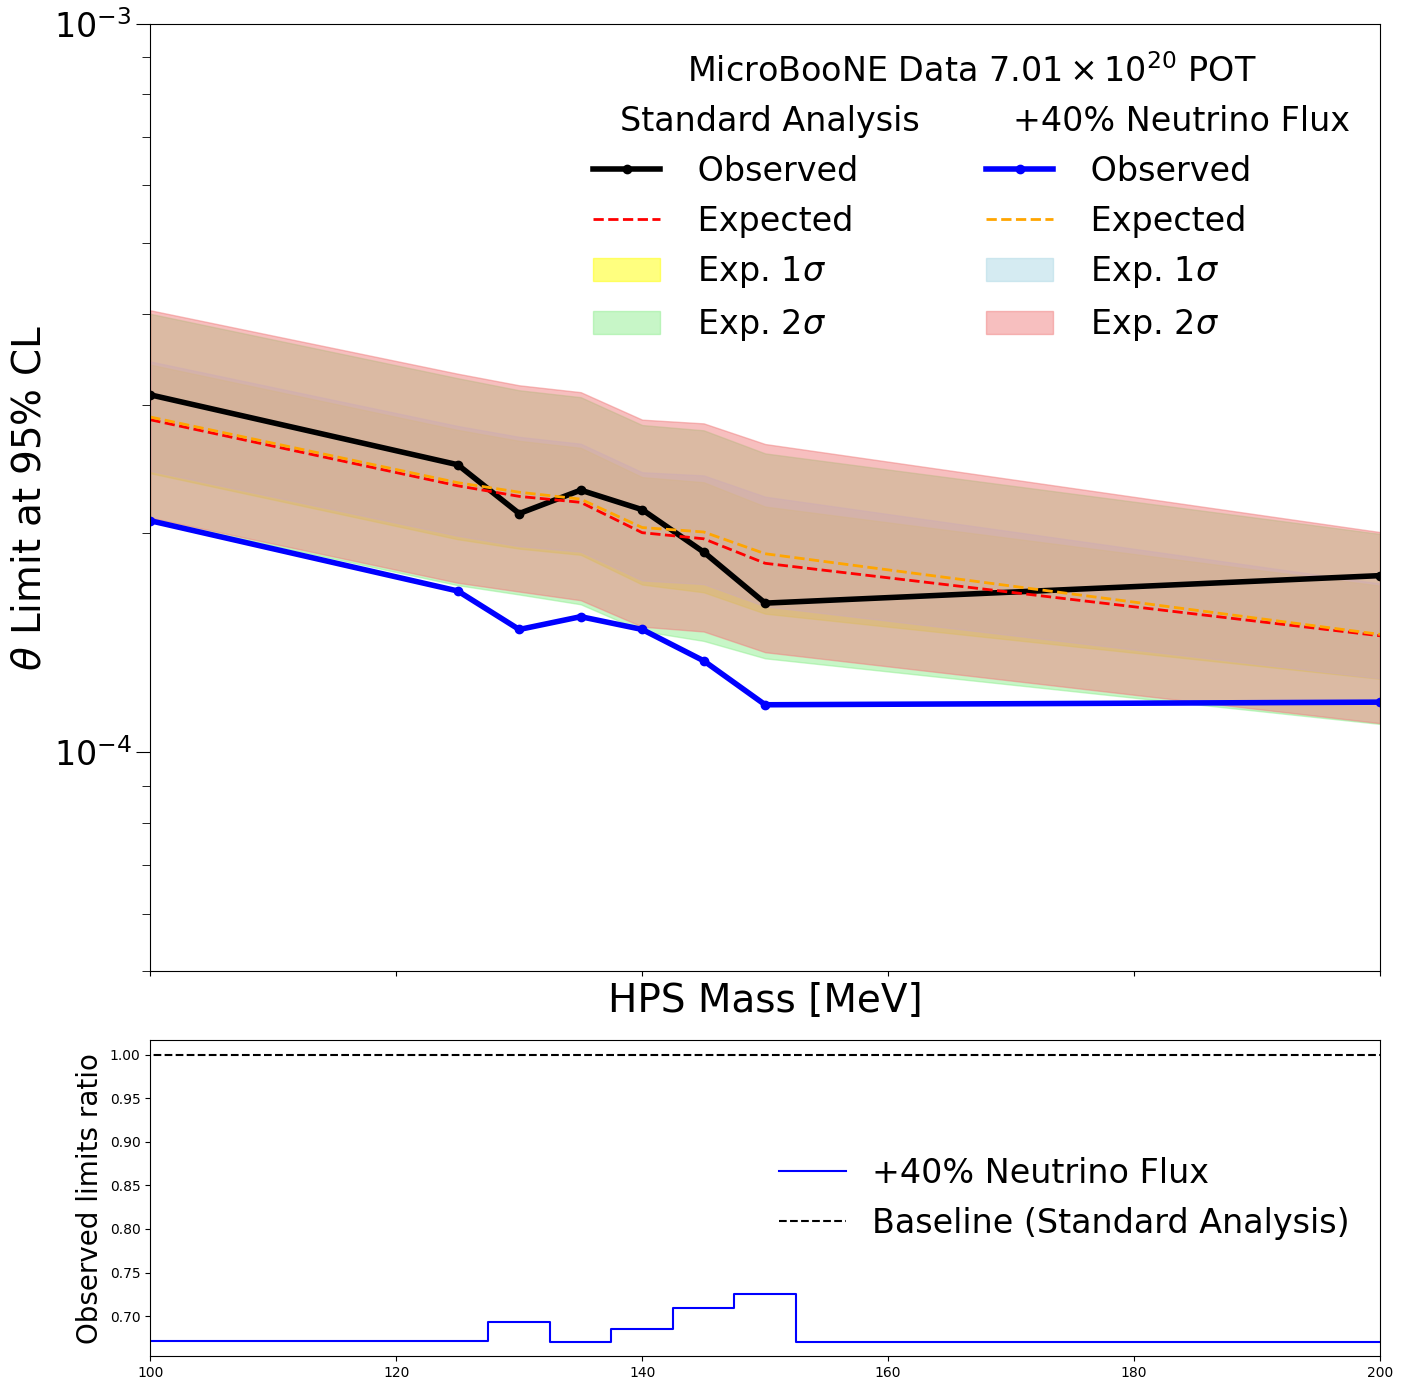

In [9]:
data_types = ["ALL","flux_scaled_1_4_ALL", ] 
limit_to_compare = 'obs_limit'
compare_limits(data_types, limit_to_compare, data_labels=['Standard Analysis', '+40% Neutrino Flux'])

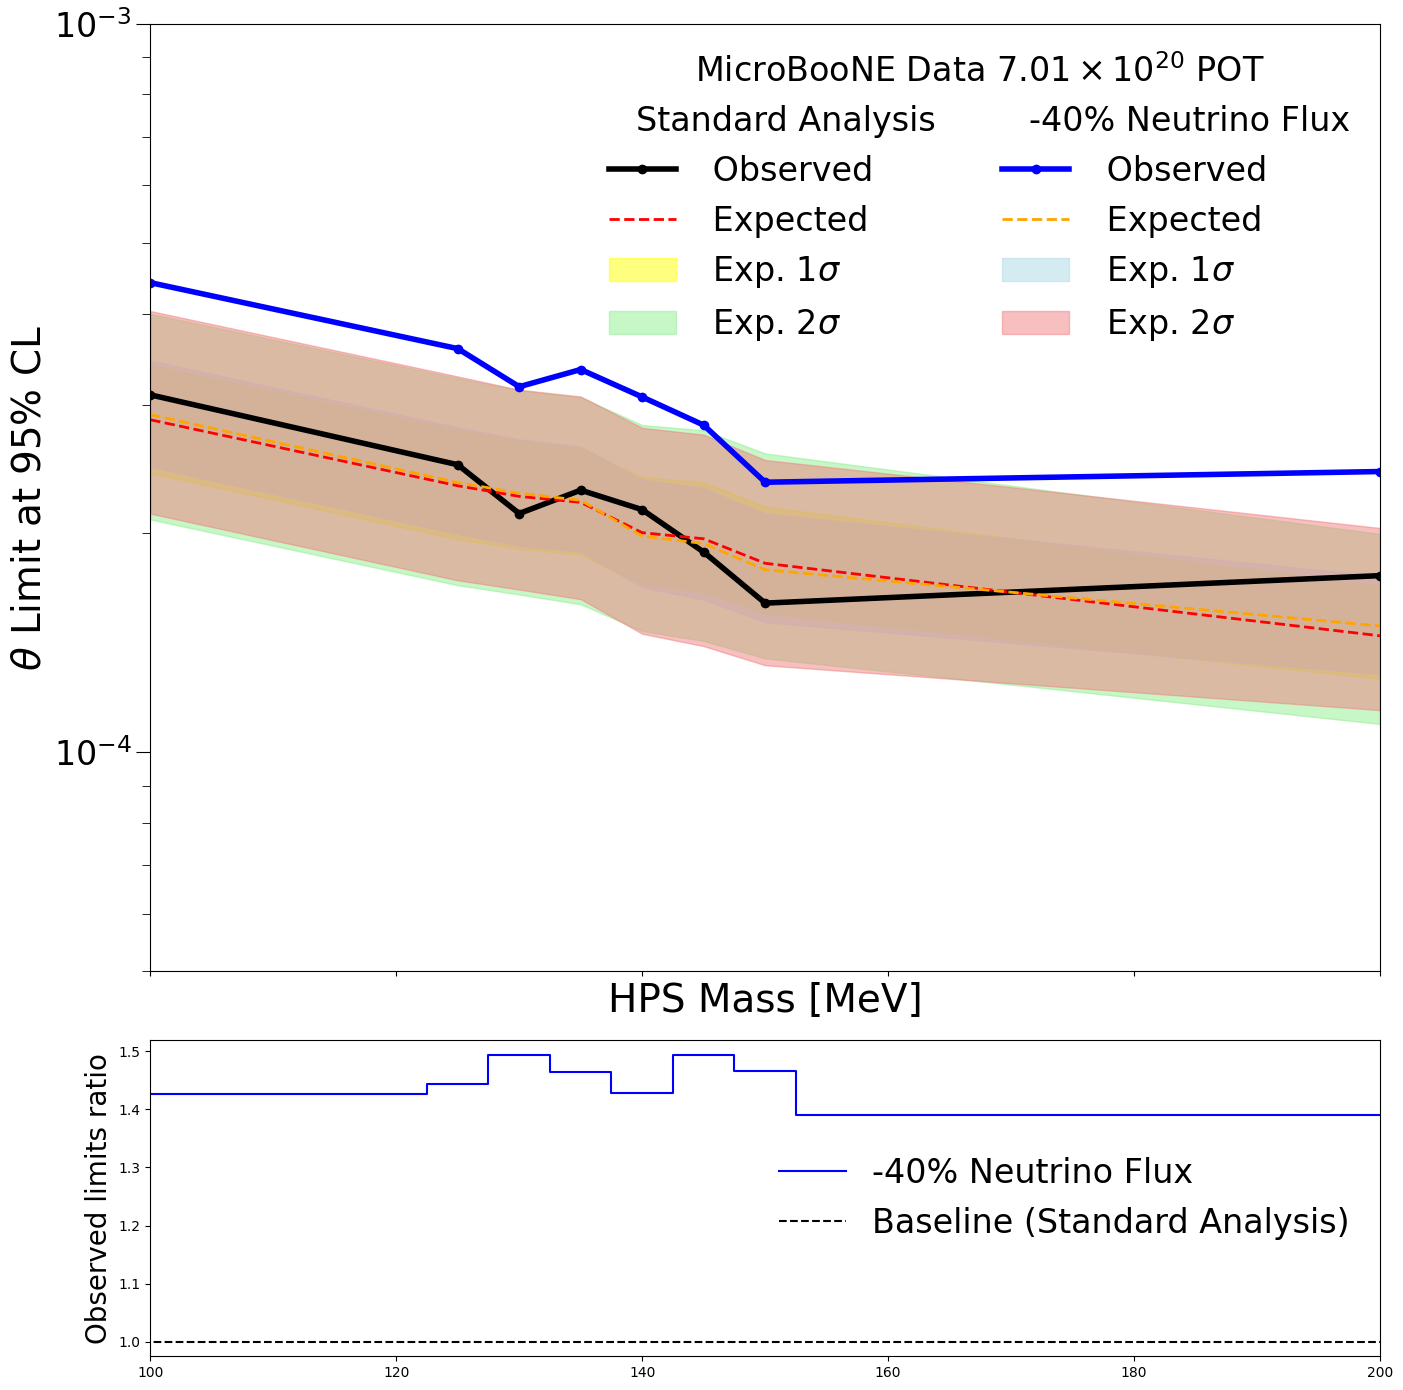

In [10]:
data_types = ["ALL","flux_scaled_0_6_ALL", ] 
limit_to_compare = 'obs_limit'
compare_limits(data_types, limit_to_compare, data_labels=['Standard Analysis', '-40% Neutrino Flux'])

## KDAR signal scaled

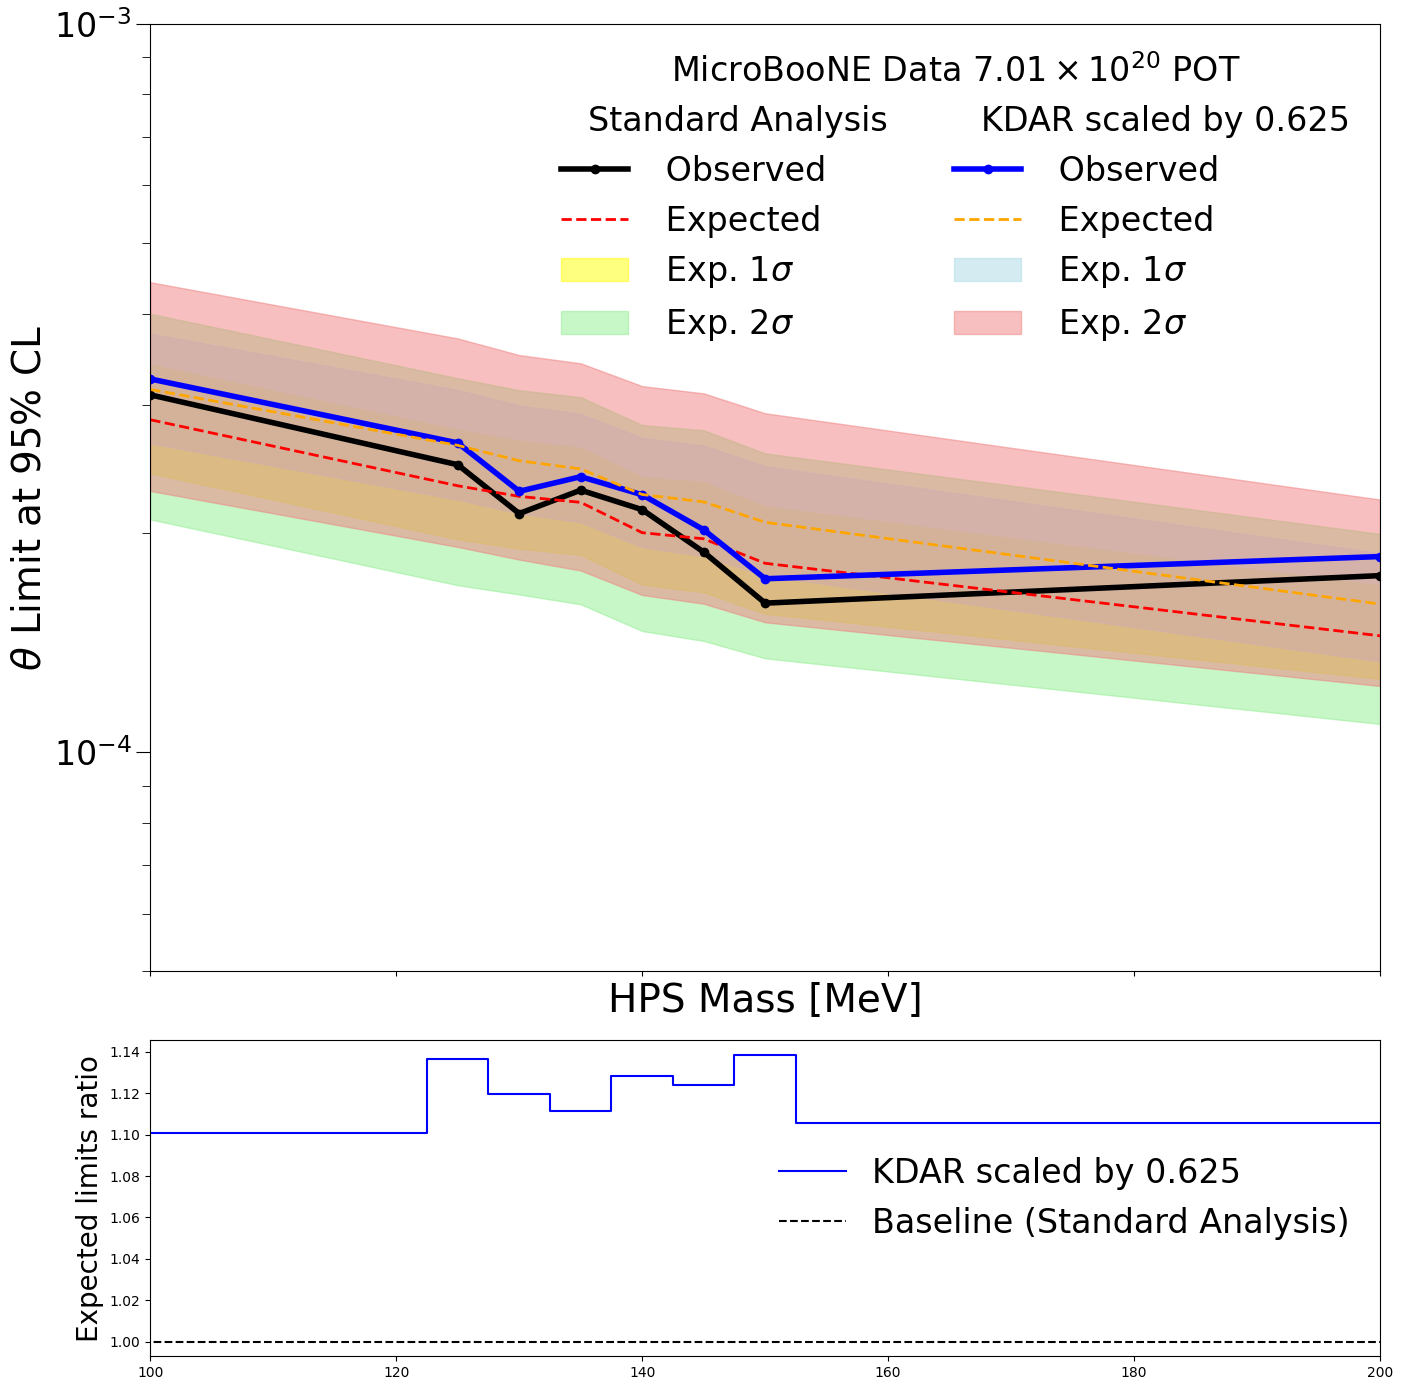

In [11]:
data_types = ["ALL","kdar_signal_scaled_0_625_ALL", ] 
limit_to_compare = 'exp_limit'
compare_limits(data_types, limit_to_compare, data_labels=['Standard Analysis', 'KDAR scaled by 0.625'])

## Interpolating 

In [15]:
def get_interpolated_vals(x, y, x_vals_wanted):
    y_interp = np.interp(x_vals_wanted, x, y)

    return y_interp



In [32]:
x_vals_2

array([120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
       133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145,
       146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158,
       159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171,
       172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184,
       185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197,
       198, 199])

In [16]:
x_vals = np.arange(50, 140, 1)

uboone_interp = get_interpolated_vals(uboone_NEW["Mass"], uboone_NEW["Value"], x_vals)
E949_interp = get_interpolated_vals(E949_p1['Mass'], E949_p1['Value'], x_vals)



In [17]:
for i, val in enumerate(uboone_interp):
    if val < E949_interp[i]: break
    
print(i)
print(x_vals[i])
print(val)

0
50
0.0003095266496978


In [36]:
x_vals_2 = np.arange(100, 200, 1)

uboone_interp = get_interpolated_vals(uboone_NEW["Mass"], uboone_NEW["Value"], x_vals_2)
NA62_interp = get_interpolated_vals(NA62_p3['Mass'], NA62_p3['Value'], x_vals_2)


In [37]:
print(np.shape(uboone_interp))
print(np.shape(x_vals_2))

(100,)
(100,)


In [38]:
for i, val in enumerate(uboone_interp):
    if val > NA62_interp[i]: break

print(i)
print(x_vals_2[i])
print(val)

99
199
0.000174490768878192


## Logarithmic interpolating

In [42]:
test_uboone_log = np.log10(uboone_NEW["Value"])
test_NA62_log = np.log10(NA62_p3["Value"])

print(test_uboone_log)



0   -3.509302
1   -3.605230
2   -3.672261
3   -3.640150
4   -3.666927
5   -3.725112
6   -3.795267
7   -3.757504
Name: Value, dtype: float64


In [52]:
uboone_log_interp = get_interpolated_vals(uboone_NEW["Mass"], test_uboone_log, x_vals_2)
NA62_log_interp = get_interpolated_vals(NA62_p3['Mass'], test_NA62_log, x_vals_2)

uboone_log_interp = 10**uboone_log_interp

In [53]:
for i, val in enumerate(uboone_log_interp):
    if val > NA62_log_interp[i]: break

print(i)
print(x_vals_2[i])
print(val)

0
100
0.0003095266496977999


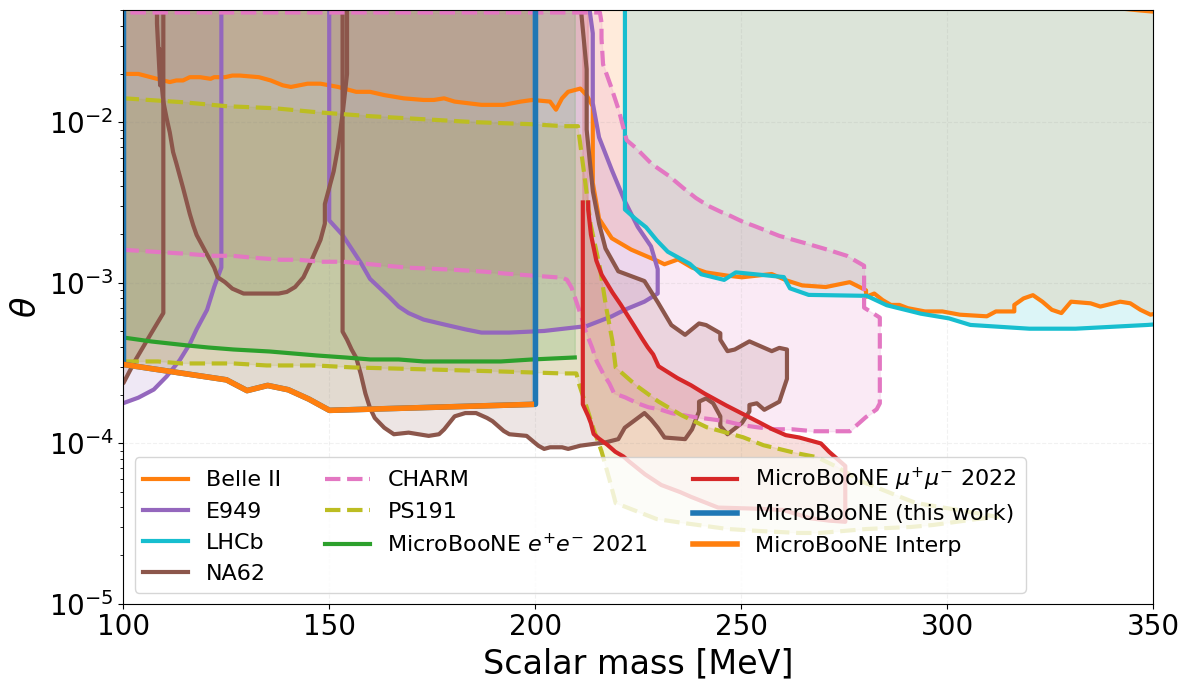

In [54]:
plt.figure(figsize=(12,7),facecolor='white',dpi=100)

# plt.plot(Belle_reduced['Mass'],Belle_reduced['Value'],label=r"Belle II",color="C1",lw=3)
# plt.fill_between(Belle_reduced['Mass'],Belle_reduced['Value'],1,color="C1",alpha=0.15)

plt.plot(Belle_full['Mass'],Belle_full['Value'],label=r"Belle II",color="C1",lw=3)
plt.fill_between(Belle_full['Mass'],Belle_full['Value'],1,color="C1",alpha=0.15)

plt.plot(E949_p1_ones['Mass'],E949_p1_ones['Value'],label=r"E949",color="C4",lw=3)
plt.fill_between(E949_p1_ones['Mass'],E949_p1_ones['Value'],1,color="C4",alpha=0.15)

plt.plot(E949_p2_ones['Mass'],E949_p2_ones['Value'],color="C4",lw=3)
plt.fill_between(E949_p2_ones['Mass'],E949_p2_ones['Value'],1,color="C4",alpha=0.15)

plt.plot(LHCb_Owen_ones['Mass'],(LHCb_Owen_ones['Value']),label=r"LHCb",color="C9",lw=3)
plt.fill_between(LHCb_Owen_ones['Mass'],(LHCb_Owen_ones['Value']),1,color="C9",alpha=0.15)

plt.plot(NA62_p1['Mass'],(NA62_p1['Value']),label=r"NA62",color="C5",lw=3)
plt.fill_between(NA62_p1['Mass'],(NA62_p1['Value']),1,color="C5",alpha=0.15)
plt.plot(NA62_p2_sorted['Mass'],(NA62_p2_sorted['Value']),color="C5",lw=3)
plt.fill_between(NA62_p2_sorted['Mass'],(NA62_p2_sorted['Value']),1,color="C5",alpha=0.15)
plt.plot(NA62_p3['Mass'],(NA62_p3['Value']),color="C5",lw=3)
plt.fill_between(NA62_p3['Mass'],(NA62_p3['Value']),1,color="C5",alpha=0.15)

# plt.plot(LHCb_p1['Mass'],np.sqrt(LHCb_p1['Value']),label=r"LHCb",color="C6",lw=3)
# plt.fill_between(LHCb_p1['Mass'],np.sqrt(LHCb_p1['Value']),1,color="C6",alpha=0.15)



plt.plot(CHARM_from_Owen['Mass'],(CHARM_from_Owen['Value']),label=r"CHARM",color="C6",lw=3,ls="dashed")
plt.fill_between(CHARM_from_Owen['Mass'],(CHARM_from_Owen['Value']),1,color="C6",alpha=0.15) 

# plt.plot(LSND_ee['Mass'],np.sqrt(LSND_ee['Value']),label=r"LSND",color="C7",lw=3,ls="dashed")
# plt.fill_between(LSND_ee['Mass'],np.sqrt(LSND_ee['Value']),1,color="C7",alpha=0.15)
# plt.plot(LSND_mumu['Mass'],np.sqrt(LSND_mumu['Value']),color="C7",lw=3,ls="dashed")
# plt.fill_between(LSND_mumu['Mass'],np.sqrt(LSND_mumu['Value']),1,color="C7",alpha=0.15)

plt.plot(PS191['Mass'],(PS191['Value']),label=r"PS191",color="C8",lw=3,ls="dashed")
plt.fill_between(PS191['Mass'],(PS191['Value']),1,color="C8",alpha=0.15)

plt.plot(uboone_2021['Mass'],uboone_2021['Value'],label=r"MicroBooNE $e^{+}e^{-}$ 2021",color="C2",lw=3)
plt.fill_between(uboone_2021['Mass'],uboone_2021['Value'],1,color="C2",alpha=0.15) #uboone_mumu

plt.plot(uboone_mumu_theta_squared['Mass'],(uboone_mumu_theta_squared['Value']),label=r"MicroBooNE $\mu^{+}\mu^{-}$ 2022",color="C3",lw=3)
plt.fill_between(uboone_mumu_theta_squared['Mass'],(uboone_mumu_theta_squared['Value']),1,color="C3",alpha=0.15)

plt.plot(uboone_NEW_ones['Mass'],uboone_NEW_ones['Value'],label=r"MicroBooNE (this work)",color="C10",lw=4)
plt.fill_between(uboone_NEW_ones['Mass'],uboone_NEW_ones['Value'],1,color="C10",alpha=0.15)



# plt.plot(x_vals_2,uboone_log_interp,label=r"MicroBooNE Interp",color="C11",lw=4)
# plt.fill_between(x_vals_2,uboone_log_interp,1,color="C11",alpha=0.15)



plt.xlabel(r'Scalar mass [MeV]',fontsize=24)
plt.ylabel(r'$\theta$',fontsize=24)
# plt.xticks([0, 50, 100, 150, 200, 245])
# plt.legend()
plt.ylim(1e-5,5e-2) #2e-9
plt.xlim(100,350)
plt.grid(ls='--',color='C7',alpha=0.1)
plt.yscale('log')
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.legend(prop={'size': 16}, loc="lower left",ncol=3)

plt.tight_layout()

name = f"Edited_Reinterp_HPS_limit_comparison_plot"

savefig = input(f"Do you want to save the figure as {name}? y/n")

if savefig == "y":
    plt.savefig(root_dir+'Plots/Limits/'+name+'.pdf',bbox_inches='tight', pad_inches=0.3)
    plt.savefig(root_dir+'Plots/Limits/'+name+'.png',bbox_inches='tight', pad_inches=0.3)
plt.show()
